### 1. Importando Librerias

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
from google.colab import drive, files
from datetime import datetime
import seaborn as sns

### 2. Importando dataset

#### 2.1 Dataset inicial

In [52]:
drive.mount('/content/drive')
df_inicial = pd.read_excel("/content/drive/MyDrive/Bootcamp Llamadas Cobranza/Dataset/Transcripciones_Variables.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   archivo                                     605 non-null    object 
 1   duracion_seg                                605 non-null    float64
 2   transcripcion                               605 non-null    object 
 3   CONN_ID                                     592 non-null    object 
 4   AGENT_ID                                    592 non-null    float64
 5   SURVEY                                      592 non-null    object 
 6   1.1 Apertura de Llamada                     583 non-null    float64
 7   2.2 Alternativas de acuerdo a la necesidad  580 non-null    float64
 8   4.1 Condiciones de incumplimiento           572 non-null    float64
 9   4.2 Explica medios de pago                  506 non-null    float64
dtypes: float64(6),

In [54]:
df_inicial = df_inicial[['archivo','duracion_seg','transcripcion','CONN_ID','4.1 Condiciones de incumplimiento']]
df_inicial = df_inicial.dropna(subset=["4.1 Condiciones de incumplimiento"])
print(len(df_inicial))

572


#### 2.2 Datos adicionales

In [55]:
df_adicional = pd.read_excel("/content/drive/MyDrive/Bootcamp Llamadas Cobranza/Dataset/Transcripciones_Variables_Adicionales.xlsx")

In [56]:
df_adicional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   archivo                                     374 non-null    object 
 1   duracion_seg                                374 non-null    float64
 2   transcripcion                               373 non-null    object 
 3   CONN_ID                                     373 non-null    object 
 4   AGENT_ID                                    373 non-null    float64
 5   SURVEY                                      373 non-null    object 
 6   1.1 Apertura de Llamada                     20 non-null     float64
 7   2.2 Alternativas de acuerdo a la necesidad  214 non-null    float64
 8   4.1 Condiciones de incumplimiento           163 non-null    float64
 9   4.2 Explica medios de pago                  81 non-null     float64
dtypes: float64(6),

In [57]:
df_adicional = df_adicional[['archivo','duracion_seg','transcripcion','CONN_ID','4.1 Condiciones de incumplimiento']]
df_adicional = df_adicional.dropna(subset=["4.1 Condiciones de incumplimiento"])
df_adicional = df_adicional[df_adicional["4.1 Condiciones de incumplimiento"]==1]
print(len(df_adicional))

163


#### 2.3 Dataset final

In [58]:
df = pd.concat([df_inicial, df_adicional], ignore_index=True)
print(len(df))

735


In [59]:
conteo = df["4.1 Condiciones de incumplimiento"].value_counts()
print(conteo)

4.1 Condiciones de incumplimiento
0.0    521
1.0    214
Name: count, dtype: int64


#### 2.1 Gráficas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-431925818.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="4.1 Condiciones de incumplimiento", data=df, palette="Blues")


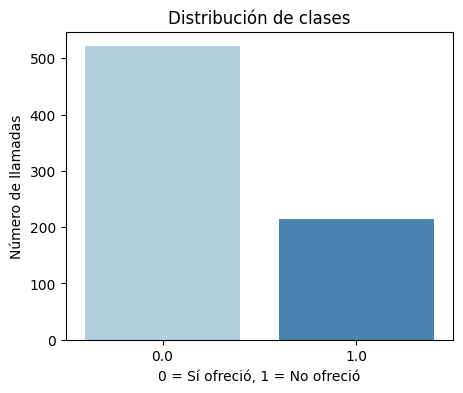

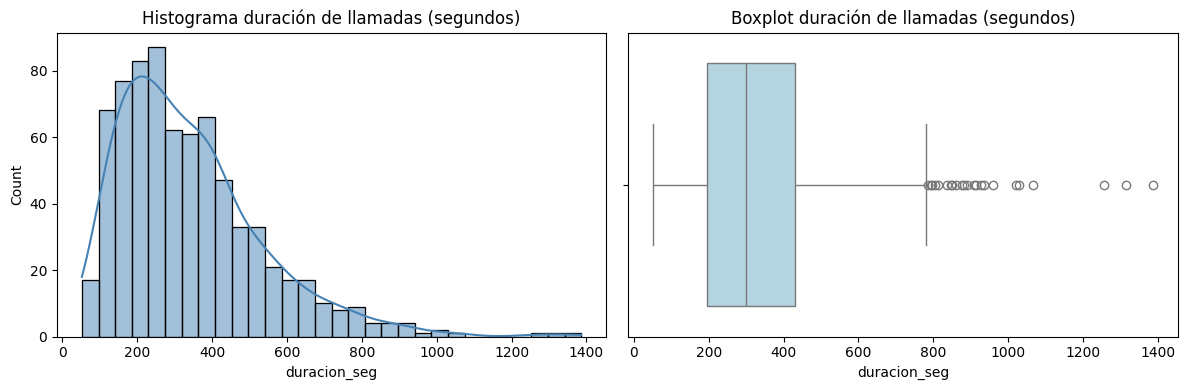

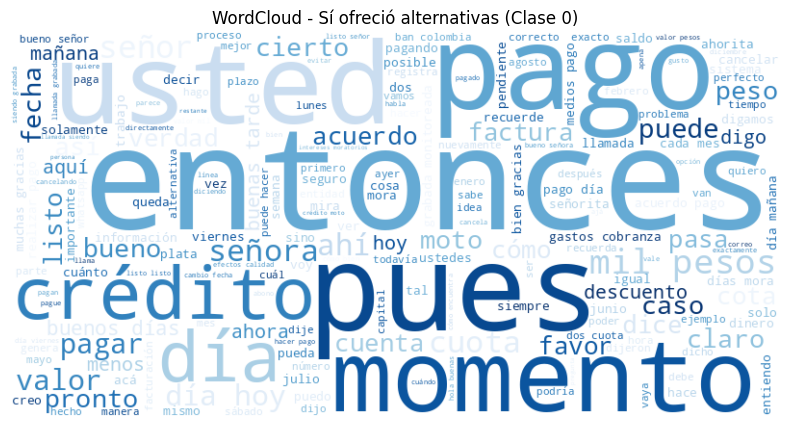

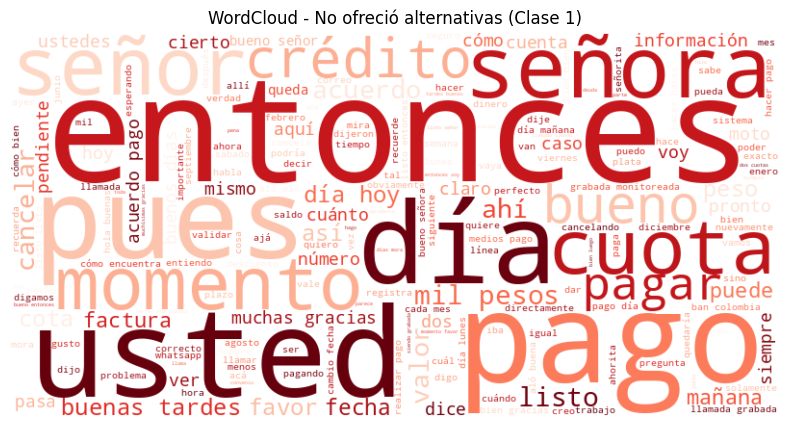

/tmp/ipython-input-431925818.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="4.1 Condiciones de incumplimiento", y="longitud", data=df, palette="Set2")


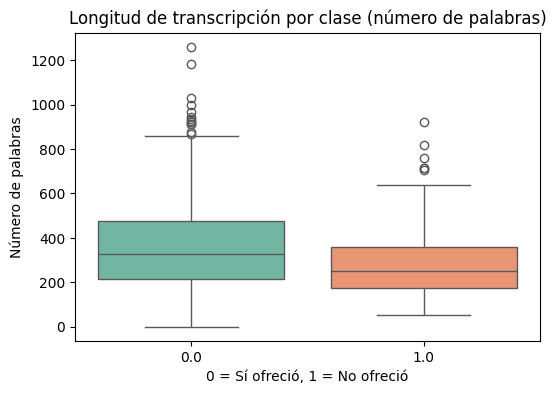

In [ ]:
# !pip install seaborn wordcloud nltk
from wordcloud import WordCloud
import nltk, re
from collections import Counter

# Asegura stopwords en español
try:
    from nltk.corpus import stopwords
    _ = stopwords.words("spanish")
except:
    nltk.download("stopwords")
from nltk.corpus import stopwords
spanish_stopwords = set(stopwords.words("spanish"))

# ----------------------------
# 1) Distribución de clases
# ----------------------------
plt.figure(figsize=(5,4))
sns.countplot(x="4.1 Condiciones de incumplimiento", data=df, palette="Blues")
plt.title("Distribución de clases")
plt.xlabel("0 = Sí ofreció, 1 = No ofreció")
plt.ylabel("Número de llamadas")
plt.show()

# ----------------------------
# 2) Duración de llamadas
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Histograma
sns.histplot(df["duracion_seg"], bins=30, ax=axes[0], color="steelblue", kde=True)
axes[0].set_title("Histograma duración de llamadas (segundos)")

# Boxplot
sns.boxplot(x=df["duracion_seg"], ax=axes[1], color="lightblue")
axes[1].set_title("Boxplot duración de llamadas (segundos)")

plt.tight_layout()
plt.show()

# ----------------------------
# 3) Wordcloud (por clase)
# ----------------------------
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", " ", texto)
    palabras = [p for p in texto.split() if p not in spanish_stopwords and len(p) > 2]
    return " ".join(palabras)

df["texto_limpio"] = df["transcripcion"].apply(limpiar_texto)

# Wordcloud clase 0
texto0 = " ".join(df.loc[df["4.1 Condiciones de incumplimiento"]==0, "texto_limpio"])
wc0 = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(texto0)

plt.figure(figsize=(10,5))
plt.imshow(wc0, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Sí ofreció alternativas (Clase 0)")
plt.show()

# Wordcloud clase 1
texto1 = " ".join(df.loc[df["4.1 Condiciones de incumplimiento"]==1, "texto_limpio"])
wc1 = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(texto1)

plt.figure(figsize=(10,5))
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - No ofreció alternativas (Clase 1)")
plt.show()

# ----------------------------
# 4) Longitud de transcripción por clase
# ----------------------------
df["longitud"] = df["texto_limpio"].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.boxplot(x="4.1 Condiciones de incumplimiento", y="longitud", data=df, palette="Set2")
plt.title("Longitud de transcripción por clase (número de palabras)")
plt.xlabel("0 = Sí ofreció, 1 = No ofreció")
plt.ylabel("Número de palabras")
plt.show()

### 2.1 Función para guardar resultados

Genera una fila con métricas y matriz de confusión

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, precision_recall_curve, auc
)

def make_metrics_row(
    y_true, y_pred, y_score, *,
    dataset, model, sampler, vectorizer,
    threshold=0.5, n_features=None, notes=""
):
    """Devuelve 1 fila con métricas globales, por clase, PR-AUC y confusión."""
    acc        = accuracy_score(y_true, y_pred)
    f1_micro   = f1_score(y_true, y_pred, average="micro",    zero_division=0)
    f1_macro   = f1_score(y_true, y_pred, average="macro",    zero_division=0)
    f1_weight  = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    prec_1     = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
    rec_1      = recall_score(y_true, y_pred,    pos_label=1, zero_division=0)
    f1_1       = f1_score(y_true, y_pred,        pos_label=1, zero_division=0)

    prec_0     = precision_score(y_true, y_pred, pos_label=0, zero_division=0)
    rec_0      = recall_score(y_true, y_pred,    pos_label=0, zero_division=0)
    f1_0       = f1_score(y_true, y_pred,        pos_label=0, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

    prec_curve, rec_curve, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(rec_curve, prec_curve)

    return pd.DataFrame([{
        "dataset": dataset,
        "model": model,
        "sampler": sampler,
        "vectorizer": vectorizer,
        "threshold": float(threshold),
        "n_features": int(n_features) if n_features is not None else None,
        "n_samples": int(len(y_true)),
        "prevalence_1": float((y_true == 1).mean()),

        "accuracy": acc,
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weight,
        "pr_auc": pr_auc,

        "precision_1": prec_1, "recall_1": rec_1, "f1_1": f1_1,
        "precision_0": prec_0, "recall_0": rec_0, "f1_0": f1_0,

        "tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp),
        "notes": notes,
    }])

### 3. Experimentos

#### 3.1 Baseline clasificación llamadas (TF-IDF + Logistic Regression)

Experimentos de texto (TF-IDF word/char + resampling + modelos) y Embeddings
con tuning de umbral (val) y salida "wide" por experimento

In [ ]:
import warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

# --------- Imports ML ----------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, precision_recall_curve, auc
)

# Resampling (imbalanced-learn)
try:
    from imblearn.over_sampling import RandomOverSampler, SMOTE
    from imblearn.combine import SMOTETomek
    from imblearn.pipeline import Pipeline as ImbPipeline
    _HAS_IMB = True
except Exception as e:
    _HAS_IMB = False
    print("⚠️ imbalanced-learn no disponible. Se ejecutarán solo experimentos sin resampling. Error:", e)

# Stopwords español
import nltk
try:
    from nltk.corpus import stopwords
    _ = stopwords.words("spanish")
except:
    nltk.download("stopwords")
from nltk.corpus import stopwords
SPANISH_SW = stopwords.words("spanish")

# Embeddings (Sentence-Transformers)
try:
    from sentence_transformers import SentenceTransformer
    _HAS_SENT = True
except Exception as e:
    _HAS_SENT = False
    print("⚠️ sentence-transformers no disponible. Se omitirá el experimento de embeddings. Error:", e)

RSEED = 42


# =========================================================
# Helpers
# =========================================================

def tune_threshold_on_val(y_val, scores_val):
    """Devuelve el umbral que maximiza F1 de la clase positiva en el set de validación."""
    prec, rec, thr = precision_recall_curve(y_val, scores_val)
    f1 = (2 * prec * rec) / (prec + rec + 1e-12)
    # precision_recall_curve devuelve len(thr) = len(prec)-1
    best_idx = int(np.nanargmax(f1[:-1])) if len(thr) > 0 else 0
    thr_opt = thr[best_idx] if len(thr) > 0 else 0.5
    return float(thr_opt)


def score_from_estimator(pipe, X):
    """Obtiene scores continuos: predict_proba si existe, si no decision_function."""
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "predict_proba"):
        return pipe.predict_proba(X)[:, 1]
    return pipe.decision_function(X)


# =========================================================
# Núcleo: ejecutar experimentos de texto con vectorizador + sampler + modelo
# =========================================================
def _run_text_experiment(X_tr, y_tr, X_te, y_te,
                         vectorizer, vec_name,
                         sampler, sampler_name,
                         clf, model_name, notes=""):
    """Entrena con tuning de umbral (val) y devuelve fila de métricas (test)."""
    # split de validación para umbral
    X_tr_t, X_val, y_tr_t, y_val = train_test_split(
        X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=RSEED
    )
    # Pipeline (con o sin resampleo)
    steps = [("tfidf", vectorizer)]
    if sampler is not None and _HAS_IMB:
        steps.append(("sampler", sampler))
    steps.append(("clf", clf))
    pipe = ImbPipeline(steps) if (_HAS_IMB and sampler is not None) else ImbPipeline(steps)

    # Fit y threshold
    pipe.fit(X_tr_t, y_tr_t)
    n_features = pipe.named_steps["tfidf"].transform(X_tr_t).shape[1]
    val_scores = score_from_estimator(pipe, X_val)
    thr_opt = tune_threshold_on_val(y_val, val_scores)

    # Test
    test_scores = score_from_estimator(pipe, X_te)
    y_pred = (test_scores >= thr_opt).astype(int)

    row = make_metrics_row(
        y_true=y_te, y_pred=y_pred, y_score=test_scores,
        dataset="test", model=model_name, sampler=sampler_name,
        vectorizer=vec_name, threshold=thr_opt, n_features=n_features,
        notes=notes
    )
    return row


# =========================================================
# Público: función principal
# =========================================================
# Muestra el avance de los experimentos
from time import time
try:
    from tqdm.auto import tqdm
    _HAS_TQDM = True
except Exception:
    _HAS_TQDM = False

def run_all_experiments(
    df,
    text_col="transcripcion",
    target_col="4.1 Condiciones de incumplimiento",
    test_size=0.2,
    verbose=True,
    sampler_ratios=(0.6, 0.75, 1.0),
    smote_k=3
):
    """Corre TF-IDF (word/char) + resampling + modelos y (si disponible) embeddings + LogReg.
       Muestra progreso con barra y textos del experimento actual. Barre ratios de resampleo.
    """
    assert text_col in df.columns and target_col in df.columns, "Columnas no encontradas en df."

    X = df[text_col].astype(str)
    y = df[target_col].astype(int)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=RSEED
    )

    resultados = []

    # ---------------- Vectorizadores ----------------
    word_configs = [
        dict(name="TFIDF_word(1,2)_mf5000_md2_sublinear",
             vec=TfidfVectorizer(max_features=5000, ngram_range=(1,2),
                                 min_df=2, sublinear_tf=True, stop_words=SPANISH_SW)),
        dict(name="TFIDF_word(1,2)_mf10000_md2_sublinear",
             vec=TfidfVectorizer(max_features=10000, ngram_range=(1,2),
                                 min_df=2, sublinear_tf=True, stop_words=SPANISH_SW)),
    ]
    char_configs = [
        dict(name="TFIDF_char(3,5)_md3_sublinear",
             vec=TfidfVectorizer(analyzer="char", ngram_range=(3,5),
                                 min_df=3, sublinear_tf=True)),
    ]
    vectorizers = word_configs + char_configs

    # ---------------- Samplers (con ratios) ----------------
    samplers = [("none", None)]
    if _HAS_IMB:
        for r in sampler_ratios:
            samplers += [
                (f"ROS_{r}",          RandomOverSampler(sampling_strategy=r,  random_state=RSEED)),
                (f"SMOTE_{r}",        SMOTE(sampling_strategy=r,            random_state=RSEED, k_neighbors=smote_k)),
                (f"SMOTE_Tomek_{r}",  SMOTETomek(sampling_strategy=r,       random_state=RSEED)),
            ]

    # ---------------- Modelos ----------------
    logreg_grid = [
        ("LogReg_C0.5",       LogisticRegression(C=0.5, max_iter=1000, solver="liblinear")),
        ("LogReg_C1.0",       LogisticRegression(C=1.0, max_iter=1000, solver="liblinear")),
        ("LogReg_bal_C1.0",   LogisticRegression(C=1.0, max_iter=1000, solver="liblinear", class_weight="balanced")),
    ]
    svm_calib = [
        ("LinearSVM_bal_calib",
         CalibratedClassifierCV(estimator=LinearSVC(C=1.0, class_weight="balanced", random_state=RSEED),
                                method="sigmoid", cv=3))
    ]
    rf_models = [
        ("RandomForest_bal",
         RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=RSEED, class_weight="balanced_subsample"))
    ]
    model_sets = [logreg_grid, svm_calib, rf_models]

    # ------ Prepara la lista de combinaciones para mostrar progreso ------
    combos = []
    for v in vectorizers:
        for s_name, s in samplers:
            for models in model_sets:
                for m_name, clf in models:
                    combos.append((v, s_name, s, m_name, clf))

    total_runs = len(combos) + (1 if _HAS_SENT else 0)
    if verbose:
        header = f"▶️ Ejecutando {total_runs} experimentos " + ("(incluye embeddings)" if _HAS_SENT else "(sin embeddings)")
        print(header)

    prog_iter = tqdm(range(len(combos))) if (_HAS_TQDM and verbose) else range(len(combos))
    t0_all = time()

    # ---------------- Loop principal (TF-IDF) ----------------
    for i in prog_iter:
        v, s_name, s, m_name, clf = combos[i]
        vec_name = v["name"]
        if _HAS_TQDM and verbose:
            tqdm.write(f"[{i+1}/{total_runs}] vec={vec_name} | sampler={s_name} | model={m_name}")
        elif verbose:
            print(f"[{i+1}/{total_runs}] vec={vec_name} | sampler={s_name} | model={m_name}")

        t0 = time()
        try:
            row = _run_text_experiment(
                X_tr, y_tr, X_te, y_te,
                vectorizer=v["vec"], vec_name=vec_name,
                sampler=s, sampler_name=s_name,
                clf=clf, model_name=m_name,
                notes="thr tuned on val (F1_1)"
            )
            resultados.append(row)
        except Exception as e:
            err_note = f"ERROR: {type(e).__name__}: {e}"
            if verbose:
                print("   ↪︎", err_note)
            resultados.append(pd.DataFrame([{
                "dataset":"test","model":m_name,"sampler":s_name,"vectorizer":vec_name,
                "threshold":np.nan,"n_features":np.nan,"n_samples":len(y_te),"prevalence_1":float((y_te==1).mean()),
                "accuracy":np.nan,"f1_micro":np.nan,"f1_macro":np.nan,"f1_weighted":np.nan,"pr_auc":np.nan,
                "precision_1":np.nan,"recall_1":np.nan,"f1_1":np.nan,
                "precision_0":np.nan,"recall_0":np.nan,"f1_0":np.nan,
                "tn":np.nan,"fp":np.nan,"fn":np.nan,"tp":np.nan,
                "notes":err_note
            }]))
        finally:
            if verbose:
                dur = time() - t0
                msg = f"   ✓ listo en {dur:.1f}s"
                if _HAS_TQDM:
                    tqdm.write(msg)
                else:
                    print(msg)

    # ---------------- Embeddings + Logistic ----------------
    if _HAS_SENT:
        i = len(combos)
        if verbose:
            msg = f"[{i+1}/{total_runs}] vectorizer=SBERT-mpnet | sampler=none | model=LogReg_bal_C1.0"
            print(msg) if not _HAS_TQDM else tqdm.write(msg)

        enc = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")
        X_tr_t, X_val, y_tr_t, y_val = train_test_split(
            X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=RSEED
        )
        t0 = time()
        try:
            Xtr_emb = enc.encode(list(X_tr_t), batch_size=64, show_progress_bar=False)
            Xval_emb = enc.encode(list(X_val),   batch_size=64, show_progress_bar=False)
            Xte_emb  = enc.encode(list(X_te),    batch_size=64, show_progress_bar=False)

            clf = LogisticRegression(C=1.0, max_iter=2000, class_weight="balanced")
            clf.fit(Xtr_emb, y_tr_t)
            val_scores = clf.predict_proba(Xval_emb)[:,1]
            thr_opt = tune_threshold_on_val(y_val, val_scores)

            test_scores = clf.predict_proba(Xte_emb)[:,1]
            y_pred = (test_scores >= thr_opt).astype(int)

            row = make_metrics_row(
                y_true=y_te, y_pred=y_pred, y_score=test_scores,
                dataset="test", model="LogReg_bal_C1.0", sampler="none",
                vectorizer="SBERT-mpnet", threshold=thr_opt,
                n_features=Xtr_emb.shape[1], notes="embeddings + logistic (thr tuned on val)"
            )
            resultados.append(row)
        except Exception as e:
            err_note = f"ERROR embeddings: {type(e).__name__}: {e}"
            if verbose:
                print("   ↪︎", err_note)
            resultados.append(pd.DataFrame([{
                "dataset":"test","model":"LogReg_bal_C1.0","sampler":"none","vectorizer":"SBERT-mpnet",
                "threshold":np.nan,"n_features":np.nan,"n_samples":len(y_te),"prevalence_1":float((y_te==1).mean()),
                "accuracy":np.nan,"f1_micro":np.nan,"f1_macro":np.nan,"f1_weighted":np.nan,"pr_auc":np.nan,
                "precision_1":np.nan,"recall_1":np.nan,"f1_1":np.nan,
                "precision_0":np.nan,"recall_0":np.nan,"f1_0":np.nan,
                "tn":np.nan,"fp":np.nan,"fn":np.nan,"tp":np.nan,
                "notes":err_note
            }]))
        finally:
            if verbose:
                dur = time() - t0
                msg = f"   ✓ embeddings listos en {dur:.1f}s"
                print(msg) if not _HAS_TQDM else tqdm.write(msg)

    if verbose:
        print(f"⏱️ Tiempo total: {time() - t0_all:.1f}s")

    # ---------------- Salida ----------------
    resultados = pd.concat(resultados, ignore_index=True)
    orden = resultados.sort_values(["f1_1","pr_auc"], ascending=False).reset_index(drop=True)
    return resultados, orden

In [ ]:
resultados, ranking = run_all_experiments(df)
resultados

▶️ Ejecutando 151 experimentos (incluye embeddings)


  0%|          | 0/150 [00:00<?, ?it/s]

[1/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=none | model=LogReg_C0.5
   ✓ listo en 1.6s
[2/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=none | model=LogReg_C1.0
   ✓ listo en 1.1s
[3/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=none | model=LogReg_bal_C1.0
   ✓ listo en 1.0s
[4/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=none | model=LinearSVM_bal_calib
   ✓ listo en 1.1s
[5/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=none | model=RandomForest_bal
   ✓ listo en 2.5s
[6/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=ROS_0.6 | model=LogReg_C0.5
   ✓ listo en 1.1s
[7/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=ROS_0.6 | model=LogReg_C1.0
   ✓ listo en 1.1s
[8/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=ROS_0.6 | model=LogReg_bal_C1.0
   ✓ listo en 1.1s
[9/151] vec=TFIDF_word(1,2)_mf5000_md2_sublinear | sampler=ROS_0.6 | model=LinearSVM_bal_calib
   ✓ listo en 1.4s
[10/151] vec=TFIDF_word(1,2)_mf5

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   ✓ embeddings listos en 7.2s
⏱️ Tiempo total: 688.7s


,dataset,model,sampler,vectorizer,threshold,n_features,n_samples,prevalence_1,accuracy,f1_micro,...,recall_1,f1_1,precision_0,recall_0,f1_0,tn,fp,fn,tp,notes
0,test,LogReg_C0.5,none,"TFIDF_word(1,2)_mf5000_md2_sublinear",0.318040,5000,147,0.292517,0.809524,0.809524,...,0.697674,0.681818,0.872549,0.855769,0.864078,89,15,13,30,thr tuned on val (F1_1)
1,test,LogReg_C1.0,none,"TFIDF_word(1,2)_mf5000_md2_sublinear",0.290432,5000,147,0.292517,0.768707,0.768707,...,0.883721,0.690909,0.937500,0.721154,0.815217,75,29,5,38,thr tuned on val (F1_1)
2,test,LogReg_bal_C1.0,none,"TFIDF_word(1,2)_mf5000_md2_sublinear",0.519736,5000,147,0.292517,0.802721,0.802721,...,0.581395,0.632911,0.837838,0.894231,0.865116,93,11,18,25,thr tuned on val (F1_1)
3,test,LinearSVM_bal_calib,none,"TFIDF_word(1,2)_mf5000_md2_sublinear",0.309073,5000,147,0.292517,0.782313,0.782313,...,0.837209,0.692308,0.918605,0.759615,0.831579,79,25,7,36,thr tuned on val (F1_1)
4,test,RandomForest_bal,none,"TFIDF_word(1,2)_mf5000_md2_sublinear",0.356667,5000,147,0.292517,0.843537,0.843537,...,0.813953,0.752688,0.917526,0.855769,0.885572,89,15,8,35,thr tuned on val (F1_1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,test,LogReg_C1.0,SMOTE_Tomek_1.0,"TFIDF_char(3,5)_md3_sublinear",0.486533,60692,147,0.292517,0.816327,0.816327,...,0.674419,0.682353,0.866667,0.875000,0.870813,91,13,14,29,thr tuned on val (F1_1)
147,test,LogReg_bal_C1.0,SMOTE_Tomek_1.0,"TFIDF_char(3,5)_md3_sublinear",0.486533,60692,147,0.292517,0.816327,0.816327,...,0.674419,0.682353,0.866667,0.875000,0.870813,91,13,14,29,thr tuned on val (F1_1)
148,test,LinearSVM_bal_calib,SMOTE_Tomek_1.0,"TFIDF_char(3,5)_md3_sublinear",0.238377,60692,147,0.292517,0.857143,0.857143,...,0.720930,0.746988,0.887850,0.913462,0.900474,95,9,12,31,thr tuned on val (F1_1)
149,test,RandomForest_bal,SMOTE_Tomek_1.0,"TFIDF_char(3,5)_md3_sublinear",0.403333,60692,147,0.292517,0.823129,0.823129,...,0.837209,0.734694,0.923913,0.817308,0.867347,85,19,7,36,thr tuned on val (F1_1)


In [ ]:
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
path = f"/content/drive/MyDrive/Bootcamp Llamadas Cobranza/resultados_mas_datos_adicionales_{ts}.xlsx"

# Exportar a Excel
resultados.to_excel(path, index=False)
# Descargar
files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==========================================
# Reentrenar y exportar el mejor modelo TF-IDF (según 'orden'/'resultados')
# Compatible con las convenciones de run_all_experiments
# ==========================================
import re, os
import numpy as np
import pandas as pd
from joblib import dump

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

# Resampling (si está disponible en tu entorno)
try:
    from imblearn.over_sampling import RandomOverSampler, SMOTE
    from imblearn.combine import SMOTETomek
    _HAS_IMB = True
except Exception:
    _HAS_IMB = False

RSEED = 42
TEXT_COL   = "transcripcion"
TARGET_COL = "4.1 Condiciones de incumplimiento"
OUTPUT_PATH = "/content/drive/MyDrive/Bootcamp Llamadas Cobranza/mejor_modelo_tfidf.joblib"

# ---------- Helpers para reconstruir componentes ----------

def build_vectorizer(vec_name: str):
    """
    Soporta:
      - 'TFIDF_word(1,2)_mf5000_md2_sublinear'
      - 'TFIDF_word(1,2)_mf10000_md2_sublinear'
      - 'TFIDF_char(3,5)_md3_sublinear'
    Usa SPANISH_SW (lista) para word; None para char.
    """
    m = re.fullmatch(r"TFIDF_(word|char)\((\d+),(\d+)\)_(.+)", vec_name)
    assert m, f"Nombre de vectorizador no reconocido: {vec_name}"
    analyzer = m.group(1)
    n1, n2 = int(m.group(2)), int(m.group(3))
    tail = m.group(4)

    # Flags/params
    sublinear_tf = ("sublinear" in tail)
    # min_df
    m_md = re.search(r"md(\d+)", tail)
    min_df = int(m_md.group(1)) if m_md else 1
    # max_features (solo en word)
    max_features = None
    m_mf = re.search(r"mf(\d+)", tail)
    if m_mf and analyzer == "word":
        max_features = int(m_mf.group(1))

    kwargs = dict(
        ngram_range=(n1, n2),
        min_df=min_df,
        sublinear_tf=sublinear_tf,
        strip_accents="unicode"
    )
    if analyzer == "word":
        kwargs.update(dict(
            max_features=max_features,
            stop_words=list(SPANISH_SW)  # asegura lista
        ))
    else:
        kwargs.update(dict(analyzer="char"))  # sin stopwords

    return TfidfVectorizer(**kwargs)

def build_sampler(name: str):
    """
    Soporta:
      - 'none'
      - 'ROS_0.5'  -> RandomOverSampler(sampling_strategy=0.5)
      - 'SMOTE_1.0' -> SMOTE(sampling_strategy=1.0, k_neighbors=3 por defecto de tus experimentos)
      - 'SMOTE_Tomek_0.5' -> SMOTETomek(sampling_strategy=0.5)
    """
    if (name is None) or (str(name).lower() == "none") or (not _HAS_IMB):
        return None
    m = re.fullmatch(r"(ROS|SMOTE|SMOTE_Tomek)_(\d*\.?\d+)", name)
    assert m, f"Sampler no reconocido: {name}"
    kind, ratio = m.group(1), float(m.group(2))

    if kind == "ROS":
        return RandomOverSampler(sampling_strategy=ratio, random_state=RSEED)
    if kind == "SMOTE":
        # k_neighbors = 3 es el usado en tus experimentos (parámetro smote_k)
        return SMOTE(sampling_strategy=ratio, random_state=RSEED, k_neighbors=3)
    if kind == "SMOTE_Tomek":
        return SMOTETomek(sampling_strategy=ratio, random_state=RSEED)
    return None

def build_model(name: str):
    """
    Soporta:
      - 'LogReg_C0.5', 'LogReg_C1.0'
      - 'LogReg_bal_C1.0'
      - 'LinearSVM_bal_calib'
      - 'RandomForest_bal'
    """
    if name.startswith("LogReg_bal_C"):
        C = float(name.split("_C")[1])
        return LogisticRegression(C=C, max_iter=1000, solver="liblinear", class_weight="balanced")
    if name.startswith("LogReg_C"):
        C = float(name.split("_C")[1])
        return LogisticRegression(C=C, max_iter=1000, solver="liblinear")
    if name == "LinearSVM_bal_calib":
        base = LinearSVC(C=1.0, class_weight="balanced", random_state=RSEED)
        return CalibratedClassifierCV(estimator=base, method="sigmoid", cv=3)
    if name == "RandomForest_bal":
        return RandomForestClassifier(
            n_estimators=300, n_jobs=-1, random_state=RSEED, class_weight="balanced_subsample"
        )
    raise ValueError(f"Modelo no reconocido: {name}")

# ---------- Selección de la mejor fila (orden preferente) ----------

if "orden" in globals() and isinstance(orden, pd.DataFrame) and len(orden) > 0:
    best = orden.iloc[0]
else:
    # fallback si no tienes 'orden'
    best = (
        resultados.assign(
            f1_1=pd.to_numeric(resultados["f1_macro"], errors="coerce"),
            pr_auc=pd.to_numeric(resultados["pr_auc"], errors="coerce")
        )
        .sort_values(["f1_1", "pr_auc"], ascending=False)
        .iloc[0]
    )

vec_name   = str(best["vectorizer"])
sam_name   = str(best["sampler"])
model_name = str(best["model"])
threshold  = float(best.get("threshold", 0.5))

print("Mejor experimento seleccionado:")
print(f"  Vectorizer: {vec_name}")
print(f"  Sampler   : {sam_name}")
print(f"  Modelo    : {model_name}")
print(f"  Threshold : {threshold:.3f}")

# ---------- Reconstrucción de componentes ----------
tfidf   = build_vectorizer(vec_name)
sampler = build_sampler(sam_name)
clf     = build_model(model_name)

# ---------- Dataset completo (limpio) ----------
assert TEXT_COL in df.columns and TARGET_COL in df.columns, "Columnas no encontradas en df"
df_full = df.dropna(subset=[TEXT_COL, TARGET_COL]).copy()
df_full[TARGET_COL] = df_full[TARGET_COL].astype(int)

X_full = df_full[TEXT_COL].astype(str)
y_full = df_full[TARGET_COL].to_numpy()

# ---------- Ajuste TF-IDF y resampling (solo entrenamiento) ----------
X_full_tfidf = tfidf.fit_transform(X_full)

if sampler is not None:
    X_train_final, y_train_final = sampler.fit_resample(X_full_tfidf, y_full)
else:
    X_train_final, y_train_final = X_full_tfidf, y_full

# ---------- Entrenamiento final ----------
clf.fit(X_train_final, y_train_final)

# ---------- Guardado ----------
export_obj = {
    "vectorizer": tfidf,
    "clf": clf,
    "threshold": threshold,
    "meta": {
        "model_name": model_name,
        "sampler_name": sam_name,
        "vectorizer_name": vec_name,
    }
}
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
dump(export_obj, OUTPUT_PATH)
print(f"✅ Modelo TF-IDF guardado en: {OUTPUT_PATH}")

Mejor experimento seleccionado:
  Vectorizer: TFIDF_word(1,2)_mf5000_md2_sublinear
  Sampler   : ROS_0.6
  Modelo    : RandomForest_bal
  Threshold : 0.400
✅ Modelo TF-IDF guardado en: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/mejor_modelo_tfidf.joblib


####3.2 Embeddings

Múltiples modelos + resampling + calibración

In [ ]:
# ==========================================
# Embeddings + Diales de Resampling/Modelos/PCA + Métricas completas
# Threshold optimizado por F1 de la clase 1 (validación)
# Devuelve y guarda global: resultados_embed
# ==========================================
# !pip -q install -U scikit-learn imbalanced-learn lightgbm sentence-transformers

import re, warnings, numpy as np, pandas as pd
from typing import Optional, List, Dict, Tuple

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, precision_recall_curve, auc
)
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks, RandomUnderSampler

from sentence_transformers import SentenceTransformer
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")
SEED = 42
np.random.seed(SEED)

# ---------- Helpers base ----------
def _clean_text(t: str) -> str:
    t = str(t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def _embed_batch(st_model, texts, batch_size=64):
    return st_model.encode(
        list(texts), batch_size=batch_size, convert_to_numpy=True, show_progress_bar=False
    )

def _tune_threshold_by_f1(y_true, prob, grid=np.linspace(0.01, 0.99, 99)) -> Tuple[float, float]:
    best_thr, best_f1 = 0.5, -1.0
    for t in grid:
        f1 = f1_score(y_true, (prob >= t).astype(int), pos_label=1, zero_division=0)
        if f1 > best_f1:
            best_f1, best_thr = f1, float(t)
    return best_thr, best_f1

def _make_metrics_row(y_true, y_prob, thr, *, dataset, model, sampler, vectorizer, notes, n_features=None):
    y_pred = (y_prob >= thr).astype(int)

    acc = accuracy_score(y_true, y_pred)
    f1_micro   = f1_score(y_true, y_pred, average="micro", zero_division=0)
    f1_macro   = f1_score(y_true, y_pred, average="macro", zero_division=0)
    f1_weight  = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    prec_1 = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
    rec_1  = recall_score(y_true, y_pred,    pos_label=1, zero_division=0)
    f1_1   = f1_score(y_true, y_pred,        pos_label=1, zero_division=0)

    prec_0 = precision_score(y_true, y_pred, pos_label=0, zero_division=0)
    rec_0  = recall_score(y_true, y_pred,    pos_label=0, zero_division=0)
    f1_0   = f1_score(y_true, y_pred,        pos_label=0, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

    prec_curve, rec_curve, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(rec_curve, prec_curve)

    return pd.DataFrame([{
        "dataset": dataset,
        "model": model,
        "sampler": sampler,
        "vectorizer": vectorizer,
        "threshold": float(thr),
        "n_features": int(n_features) if n_features is not None else None,
        "n_samples": int(len(y_true)),
        "prevalence_1": float((y_true == 1).mean()),

        "accuracy": acc,
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weight,
        "pr_auc": pr_auc,

        "precision_1": prec_1, "recall_1": rec_1, "f1_1": f1_1,
        "precision_0": prec_0, "recall_0": rec_0, "f1_0": f1_0,

        "tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp),
        "notes": notes,
    }])

# ---------- Diales: resampling y modelos ----------
def _build_samplers_config(
    smote_strategy_list=(0.6, 0.75, 1.0),
    smote_k_list=(3, 5),
    under_strategy_list=(0.6, 0.75, 1.0),
):
    samplers = {"none": (None, "no resampling")}
    for s in smote_strategy_list:
        for k in smote_k_list:
            samplers[f"SMOTE_s{s}_k{k}"] = (
                SMOTE(sampling_strategy=s, k_neighbors=k, random_state=SEED),
                f"SMOTE(strategy={s}, k={k})"
            )
            samplers[f"SMOTETomek_s{s}_k{k}"] = (
                SMOTETomek(smote=SMOTE(sampling_strategy=s, k_neighbors=k, random_state=SEED),
                           random_state=SEED),
                f"SMOTETomek(SMOTE strategy={s}, k={k})"
            )
    samplers["TomekLinks"] = (TomekLinks(), "TomekLinks")
    for u in under_strategy_list:
        samplers[f"RandomUnder_{u}"] = (
            RandomUnderSampler(sampling_strategy=u, random_state=SEED),
            f"RandomUnder(strategy={u})"
        )
    return samplers

def _build_lr_grid(C_list=[0.5, 1.0, 2.0], penalties=["l2","l1","elasticnet"], l1_ratio_list=[0.25, 0.5, 0.75]):
    clfs = {}
    for pen in penalties:
        for C in C_list:
            if pen == "elasticnet":
                for l1r in l1_ratio_list:
                    name = f"LogReg_bal_{pen}_C{C}_l1r{l1r}"
                    clfs[name] = LogisticRegression(max_iter=3000, class_weight="balanced",
                                                    C=C, penalty=pen, l1_ratio=l1r, solver="saga", n_jobs=-1)
            elif pen == "l1":
                name = f"LogReg_bal_{pen}_C{C}"
                clfs[name] = LogisticRegression(max_iter=3000, class_weight="balanced",
                                                C=C, penalty=pen, solver="saga", n_jobs=-1)
            else:
                name = f"LogReg_bal_{pen}_C{C}"
                clfs[name] = LogisticRegression(max_iter=3000, class_weight="balanced",
                                                C=C, penalty=pen, solver="saga", n_jobs=-1)
    return clfs

def _build_svm_grid(C_list=[0.5, 1.0, 2.0], calib_methods=["isotonic", "sigmoid"]):
    clfs = {}
    for C in C_list:
        for method in calib_methods:
            base = LinearSVC(C=C, class_weight="balanced")
            name = f"LinearSVM_bal_C{C}_calib-{method}"
            clfs[name] = CalibratedClassifierCV(estimator=base, method=method, cv=3)
    return clfs

def _build_lgbm_grid(
    configs = (
        (11, 6, 0.03, 900, 0.9, 0.9),
        (15,10, 0.05, 700, 0.8, 0.9),
        (31,20, 0.05, 600, 0.8, 0.8),
    )
):
    clfs = {}
    for (leaves, minleaf, lr, nest, colsp, subsp) in configs:
        name = f"LightGBM_L{leaves}_m{minleaf}_lr{lr}_n{nest}_cs{colsp}_ss{subsp}"
        clfs[name] = LGBMClassifier(
            objective="binary",
            class_weight="balanced",
            num_leaves=leaves,
            min_data_in_leaf=minleaf,
            learning_rate=lr,
            n_estimators=nest,
            colsample_bytree=colsp,
            subsample=subsp,
            min_sum_hessian_in_leaf=1e-3,
            max_bin=63,
            n_jobs=-1,
            verbosity=-1,
            random_state=SEED,
        )
    return clfs

# ---------- Función principal con diales ----------
def run_embedding_experiments(
    df: pd.DataFrame,
    text_col: str,
    target_col: str,
    embed_models: Optional[List[str]] = None,
    test_size: float = 0.20,
    val_size_of_train: float = 0.20,
    threshold_grid: np.ndarray = np.linspace(0.01, 0.99, 99),
    # Diales opcionales:
    use_l2: bool = True,                 # Normalización L2 tras StandardScaler
    pca_try: List[Optional[int]] = (None, 64, 128),  # PCA candidatos para LightGBM (None = sin PCA)
    # Grids:
    smote_strategy_list=(0.6, 0.75, 1.0),
    smote_k_list=(3, 5),
    under_strategy_list=(0.6, 0.75, 1.0),
    lr_C_list = (0.5, 1.0, 2.0),
    lr_penalties = ("l2","l1","elasticnet"),
    lr_l1_ratio_list = (0.25, 0.5, 0.75),
    svm_C_list = (0.5, 1.0, 2.0),
    svm_calib_methods = ("isotonic", "sigmoid"),
    lgbm_configs = (
        (11, 6, 0.03, 900, 0.9, 0.9),
        (15,10, 0.05, 700, 0.8, 0.9),
        (31,20, 0.05, 600, 0.8, 0.8),
    ),
) -> pd.DataFrame:
    """
    Experimentos SOLO con embeddings:
    - Embeddings SentenceTransformers (lista configurable)
    - Diales de resampling (SMOTE/SMOTETomek/TomekLinks/Under) con hiperparámetros
    - Modelos: LR (variantes), SVM calibrada, LightGBM (+ PCA opcional)
    - Threshold optimizado por F1 de la clase 1 en validación
    - Devuelve DataFrame 'resultados_embed' con métricas completas
    """
    if embed_models is None:
        embed_models = [
            "paraphrase-multilingual-mpnet-base-v2",
            "distiluse-base-multilingual-cased-v2",
            "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        ]

    # Limpieza mínima
    data = df.dropna(subset=[text_col, target_col]).copy()
    data[text_col] = data[text_col].map(_clean_text)
    data[target_col] = data[target_col].astype(int)
    assert set(data[target_col].unique()) <= {0,1}, "El target debe ser binario 0/1."

    # Splits
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        data[text_col], data[target_col],
        test_size=test_size, random_state=SEED, stratify=data[target_col]
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval,
        test_size=val_size_of_train, random_state=SEED, stratify=y_trainval
    )

    rows = []
    # Construye diales
    samplers = _build_samplers_config(
        smote_strategy_list=list(smote_strategy_list),
        smote_k_list=list(smote_k_list),
        under_strategy_list=list(under_strategy_list),
    )
    lr_grid  = _build_lr_grid(C_list=list(lr_C_list), penalties=list(lr_penalties), l1_ratio_list=list(lr_l1_ratio_list))
    svm_grid = _build_svm_grid(C_list=list(svm_C_list), calib_methods=list(svm_calib_methods))
    lgbm_grid = _build_lgbm_grid(configs=list(lgbm_configs))

    for emb_name in embed_models:
        print(f"\n🔹 Embedding: {emb_name}")
        st = SentenceTransformer(emb_name)

        # Embeddings
        Xtr = _embed_batch(st, X_train)
        Xva = _embed_batch(st, X_val)
        Xte = _embed_batch(st, X_test)
        n_feat = Xtr.shape[1]

        # Estandarización y (opcional) L2
        scaler = StandardScaler(with_mean=True, with_std=True)
        Xtr_s = scaler.fit_transform(Xtr)
        Xva_s = scaler.transform(Xva)
        Xte_s = scaler.transform(Xte)

        vectorizer_label = f"ST({emb_name})+Std"
        if use_l2:
            normalizer = Normalizer(norm="l2")
            Xtr_s = normalizer.fit_transform(Xtr_s)
            Xva_s = normalizer.transform(Xva_s)
            Xte_s = normalizer.transform(Xte_s)
            vectorizer_label += "+L2"

        for sampler_name, (sampler, sampler_note) in samplers.items():
            print(f"  🟡 Sampler: {sampler_name}")
            if sampler is None:
                Xtr_rs, ytr_rs = Xtr_s, y_train.to_numpy()
            else:
                Xtr_rs, ytr_rs = sampler.fit_resample(Xtr_s, y_train.to_numpy())

            # --- LOGISTIC REGRESSION (grid) ---
            for clf_name, clf in lr_grid.items():
                print(f"    ⚪ Modelo: {clf_name}")
                clf.fit(Xtr_rs, ytr_rs)
                if hasattr(clf, "predict_proba"):
                    val_prob = clf.predict_proba(Xva_s)[:, 1]
                    test_prob = clf.predict_proba(Xte_s)[:, 1]
                    calib_note = "proba=native"
                elif hasattr(clf, "decision_function"):
                    def _minmax(a):
                        a = a.astype(float); lo, hi = a.min(), a.max()
                        return (a - lo) / (hi - lo + 1e-9)
                    val_prob  = _minmax(clf.decision_function(Xva_s))
                    test_prob = _minmax(clf.decision_function(Xte_s))
                    calib_note = "proba=minmax(decision_function)"
                else:
                    raise RuntimeError("Clasificador sin probas ni decision_function.")

                thr, best_f1_val = _tune_threshold_by_f1(y_val, val_prob, grid=threshold_grid)
                rows.append(_make_metrics_row(
                    y_true=y_test, y_prob=test_prob, thr=thr,
                    dataset="test", model=clf_name, sampler=sampler_name,
                    vectorizer=vectorizer_label,
                    notes=f"{sampler_note}; thr tuned on val (F1_1={best_f1_val:.3f}); {calib_note}",
                    n_features=n_feat
                ))

            # --- SVM LINEAL CALIBRADA (grid) ---
            for clf_name, clf in svm_grid.items():
                print(f"    ⚪ Modelo: {clf_name}")
                clf.fit(Xtr_rs, ytr_rs)
                if hasattr(clf, "predict_proba"):
                    val_prob = clf.predict_proba(Xva_s)[:, 1]
                    test_prob = clf.predict_proba(Xte_s)[:, 1]
                    calib_note = "proba=calibrated"
                else:
                    raise RuntimeError("CalibratedClassifierCV debe exponer predict_proba.")
                thr, best_f1_val = _tune_threshold_by_f1(y_val, val_prob, grid=threshold_grid)
                rows.append(_make_metrics_row(
                    y_true=y_test, y_prob=test_prob, thr=thr,
                    dataset="test", model=clf_name, sampler=sampler_name,
                    vectorizer=vectorizer_label,
                    notes=f"{sampler_note}; thr tuned on val (F1_1={best_f1_val:.3f}); {calib_note}",
                    n_features=n_feat
                ))

            # --- LIGHTGBM (grid) + PCA candidatos ---
            pca_candidates = []
            for k in pca_try:
                if k is None:
                    pca_candidates.append(("noPCA", None))
                else:
                    k_eff = max(2, min(int(k), min(Xtr_rs.shape[0], Xtr_rs.shape[1]) - 1))
                    if k_eff >= 2:
                        pca_candidates.append((f"PCA{k_eff}", k_eff))

            for pca_label, kcomp in pca_candidates:
                for base_name, base_clf in lgbm_grid.items():
                    if kcomp is None:
                        name = f"{base_name}_{pca_label}"
                        clf_use = base_clf
                        nfeat_note = n_feat
                    else:
                        name = f"{base_name}_{pca_label}"
                        clf_use = Pipeline([
                            ("pca", PCA(n_components=kcomp, random_state=SEED, svd_solver="auto")),
                            ("lgbm", base_clf)
                        ])
                        nfeat_note = kcomp

                    print(f"    ⚪ Modelo: {name}")
                    clf_use.fit(Xtr_rs, ytr_rs)
                    if hasattr(clf_use, "predict_proba"):
                        val_prob = clf_use.predict_proba(Xva_s)[:, 1]
                        test_prob = clf_use.predict_proba(Xte_s)[:, 1]
                        calib_note = "proba=native"
                    elif hasattr(clf_use, "decision_function"):
                        def _minmax(a):
                            a = a.astype(float); lo, hi = a.min(), a.max()
                            return (a - lo) / (hi - lo + 1e-9)
                        val_prob  = _minmax(clf_use.decision_function(Xva_s))
                        test_prob = _minmax(clf_use.decision_function(Xte_s))
                        calib_note = "proba=minmax(decision_function)"
                    else:
                        raise RuntimeError("Clasificador sin probas ni decision_function.")

                    thr, best_f1_val = _tune_threshold_by_f1(y_val, val_prob, grid=threshold_grid)
                    rows.append(_make_metrics_row(
                        y_true=y_test, y_prob=test_prob, thr=thr,
                        dataset="test", model=name, sampler=sampler_name,
                        vectorizer=vectorizer_label,
                        notes=f"{sampler_note}; {pca_label}; thr tuned on val (F1_1={best_f1_val:.3f}); {calib_note}",
                        n_features=nfeat_note
                    ))

    resultados_embed = pd.concat(rows, ignore_index=True)
    globals()["resultados_embed"] = resultados_embed
    return resultados_embed

In [ ]:
resultados_embed = run_embedding_experiments(
    df,
    text_col="transcripcion",
    target_col="4.1 Condiciones de incumplimiento",
    embed_models=[
        "paraphrase-multilingual-mpnet-base-v2",
        "distiluse-base-multilingual-cased-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    ]
)


🔹 Embedding: paraphrase-multilingual-mpnet-base-v2
  🟡 Sampler: none
    ⚪ Modelo: LogReg_bal_l2_C0.5
    ⚪ Modelo: LogReg_bal_l2_C1.0
    ⚪ Modelo: LogReg_bal_l2_C2.0
    ⚪ Modelo: LogReg_bal_l1_C0.5
    ⚪ Modelo: LogReg_bal_l1_C1.0
    ⚪ Modelo: LogReg_bal_l1_C2.0
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.75
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.75
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.75
    ⚪ Modelo: LinearSVM_bal_C0.5_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C0.5_calib-sigmoid
    ⚪ Modelo: LinearSVM_bal_C1.0_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C1.0_calib-sigmoid
    ⚪ Modelo: LinearSVM_bal_C2.0_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C2.0_calib-sigmoid
    ⚪ Mod

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

  🟡 Sampler: none
    ⚪ Modelo: LogReg_bal_l2_C0.5
    ⚪ Modelo: LogReg_bal_l2_C1.0
    ⚪ Modelo: LogReg_bal_l2_C2.0
    ⚪ Modelo: LogReg_bal_l1_C0.5
    ⚪ Modelo: LogReg_bal_l1_C1.0
    ⚪ Modelo: LogReg_bal_l1_C2.0
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.75
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.75
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.75
    ⚪ Modelo: LinearSVM_bal_C0.5_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C0.5_calib-sigmoid
    ⚪ Modelo: LinearSVM_bal_C1.0_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C1.0_calib-sigmoid
    ⚪ Modelo: LinearSVM_bal_C2.0_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C2.0_calib-sigmoid
    ⚪ Modelo: LightGBM_L11_m6_lr0.03_n900_cs0.9_ss0.9_noPCA
 

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  🟡 Sampler: none
    ⚪ Modelo: LogReg_bal_l2_C0.5
    ⚪ Modelo: LogReg_bal_l2_C1.0
    ⚪ Modelo: LogReg_bal_l2_C2.0
    ⚪ Modelo: LogReg_bal_l1_C0.5
    ⚪ Modelo: LogReg_bal_l1_C1.0
    ⚪ Modelo: LogReg_bal_l1_C2.0
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C0.5_l1r0.75
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C1.0_l1r0.75
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.25
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.5
    ⚪ Modelo: LogReg_bal_elasticnet_C2.0_l1r0.75
    ⚪ Modelo: LinearSVM_bal_C0.5_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C0.5_calib-sigmoid
    ⚪ Modelo: LinearSVM_bal_C1.0_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C1.0_calib-sigmoid
    ⚪ Modelo: LinearSVM_bal_C2.0_calib-isotonic
    ⚪ Modelo: LinearSVM_bal_C2.0_calib-sigmoid
    ⚪ Modelo: LightGBM_L11_m6_lr0.03_n900_cs0.9_ss0.9_noPCA
 

In [ ]:
resultados_embed

,dataset,model,sampler,vectorizer,threshold,n_features,n_samples,prevalence_1,accuracy,f1_micro,...,recall_1,f1_1,precision_0,recall_0,f1_0,tn,fp,fn,tp,notes
0,test,LogReg_bal_l2_C0.5,none,ST(paraphrase-multilingual-mpnet-base-v2)+Std+L2,0.51,768,147,0.292517,0.598639,0.598639,...,0.418605,0.378947,0.736842,0.673077,0.703518,70,34,25,18,no resampling; thr tuned on val (F1_1=0.519); ...
1,test,LogReg_bal_l2_C1.0,none,ST(paraphrase-multilingual-mpnet-base-v2)+Std+L2,0.45,768,147,0.292517,0.571429,0.571429,...,0.581395,0.442478,0.766234,0.567308,0.651934,59,45,18,25,no resampling; thr tuned on val (F1_1=0.527); ...
2,test,LogReg_bal_l2_C2.0,none,ST(paraphrase-multilingual-mpnet-base-v2)+Std+L2,0.42,768,147,0.292517,0.564626,0.564626,...,0.627907,0.457627,0.777778,0.538462,0.636364,56,48,16,27,no resampling; thr tuned on val (F1_1=0.538); ...
3,test,LogReg_bal_l1_C0.5,none,ST(paraphrase-multilingual-mpnet-base-v2)+Std+L2,0.01,768,147,0.292517,0.292517,0.292517,...,1.000000,0.452632,0.000000,0.000000,0.000000,0,104,0,43,no resampling; thr tuned on val (F1_1=0.447); ...
4,test,LogReg_bal_l1_C1.0,none,ST(paraphrase-multilingual-mpnet-base-v2)+Std+L2,0.45,768,147,0.292517,0.414966,0.414966,...,0.767442,0.434211,0.736842,0.269231,0.394366,28,76,10,33,no resampling; thr tuned on val (F1_1=0.484); ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,test,LightGBM_L15_m10_lr0.05_n700_cs0.8_ss0.9_PCA64,RandomUnder_1.0,ST(sentence-transformers/paraphrase-multilingu...,0.08,64,147,0.292517,0.523810,0.523810,...,0.860465,0.513889,0.869565,0.384615,0.533333,40,64,6,37,RandomUnder(strategy=1.0); PCA64; thr tuned on...
1526,test,LightGBM_L31_m20_lr0.05_n600_cs0.8_ss0.8_PCA64,RandomUnder_1.0,ST(sentence-transformers/paraphrase-multilingu...,0.32,64,147,0.292517,0.578231,0.578231,...,0.744186,0.507937,0.828125,0.509615,0.630952,53,51,11,32,RandomUnder(strategy=1.0); PCA64; thr tuned on...
1527,test,LightGBM_L11_m6_lr0.03_n900_cs0.9_ss0.9_PCA128,RandomUnder_1.0,ST(sentence-transformers/paraphrase-multilingu...,0.63,128,147,0.292517,0.585034,0.585034,...,0.674419,0.487395,0.802817,0.548077,0.651429,57,47,14,29,RandomUnder(strategy=1.0); PCA128; thr tuned o...
1528,test,LightGBM_L15_m10_lr0.05_n700_cs0.8_ss0.9_PCA128,RandomUnder_1.0,ST(sentence-transformers/paraphrase-multilingu...,0.06,128,147,0.292517,0.360544,0.360544,...,0.813953,0.426829,0.692308,0.173077,0.276923,18,86,8,35,RandomUnder(strategy=1.0); PCA128; thr tuned o...


In [ ]:
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
path = f"/content/drive/MyDrive/Bootcamp Llamadas Cobranza/resultados_embeddings_mas_datos_adicionales_{ts}.xlsx"
# Exportar a Excel
resultados_embed.to_excel(path, index=False)
# Descargar
files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Escoge el mejor según F1_1 en test
best_row = resultados_embed.sort_values("f1_1", ascending=False).iloc[0]
print(best_row[["model","sampler","vectorizer","f1_macro","threshold"]])

model                          LinearSVM_bal_C0.5_calib-sigmoid
sampler                                           SMOTE_s0.6_k5
vectorizer    ST(sentence-transformers/paraphrase-multilingu...
f1_macro                                                0.65218
threshold                                                  0.33
Name: 1126, dtype: object


In [ ]:
# ==== Exportar el modelo ganador a Drive de forma robusta (sin indexar por filas) ====
from joblib import dump
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

# --- Config de nombres/columnas ---
TEXT_COL   = "transcripcion"
TARGET_COL = "4.1 Condiciones de incumplimiento"

# --- Asegura columnas, limpia NaN y resetea índice (evita KeyError por etiquetas de índice) ---
assert TEXT_COL in df.columns and TARGET_COL in df.columns, f"Faltan columnas {TEXT_COL}/{TARGET_COL} en df"
df_exp = df.dropna(subset=[TEXT_COL, TARGET_COL]).copy()
df_exp = df_exp.reset_index(drop=True)

# --- (Opcional) toma el threshold desde resultados_embed si está disponible y coincide con tu setup ---
thr_opt = 0.02
try:
    filtro = (
        (resultados_embed["model"] == "LightGBM_L11_m6_lr0.03_n900_cs0.9_ss0.9_PCA128") &
        (resultados_embed["sampler"] == "SMOTE_s1.0_k5") &
        (resultados_embed["vectorizer"] == "ST(paraphrase-multilingual-mpnet-base-v2)+Std+L2")
    )
    # iloc[0] usa POSICIÓN, no etiqueta → no puede disparar KeyError de índice
    thr_opt = float(resultados_embed.loc[filtro, "threshold"].astype(float).iloc[0])
except Exception as e:
    print(f"(Aviso) No pude leer threshold de resultados_embed, uso 0.02. Detalle: {e}")

# ==== Configuración del modelo ganador ====
SEED = 42  # si ya lo tienes definido, puedes omitir esta línea
embed_name = "paraphrase-multilingual-mpnet-base-v2"
scaler = StandardScaler(with_mean=True, with_std=True)
normalizer = Normalizer(norm="l2")
sampler = SMOTE(sampling_strategy=1.0, k_neighbors=5, random_state=SEED)

clf = LGBMClassifier(
    objective="binary",
    class_weight="balanced",
    num_leaves=11,
    min_data_in_leaf=6,
    learning_rate=0.03,
    n_estimators=900,
    colsample_bytree=0.9,
    subsample=0.9,
    min_sum_hessian_in_leaf=1e-3,
    max_bin=63,
    n_jobs=-1,
    verbosity=-1,
    random_state=SEED,
)

pca = PCA(n_components=128, random_state=SEED, svd_solver="auto")

# ==== Embedding model ====
emb_model = SentenceTransformer(embed_name)

# ==== Dataset completo (texto → embedding → escala → L2 → SMOTE → PCA → LGBM) ====
X = df_exp[TEXT_COL].map(str)
y = df_exp[TARGET_COL].astype(int).to_numpy()

# Embeddings
X_emb = emb_model.encode(X, batch_size=64, convert_to_numpy=True, show_progress_bar=True)

# Escalado + Normalización
X_emb_s = scaler.fit_transform(X_emb)
X_emb_s = normalizer.fit_transform(X_emb_s)

# Resampling SOLO en entrenamiento (aquí entrenas con todo el set)
X_emb_rs, y_rs = sampler.fit_resample(X_emb_s, y)

# PCA + LightGBM
X_emb_pca = pca.fit_transform(X_emb_rs)
clf.fit(X_emb_pca, y_rs)

# ==== Guardar en Drive ====
export_obj = {
    "embedding_model": embed_name,
    "scaler": scaler,
    "normalizer": normalizer,
    "sampler": sampler,   # Se guarda para documentación; en inferencia NO se aplica
    "pca": pca,
    "clf": clf,
    "threshold": float(thr_opt)
}

output_path = "/content/drive/MyDrive/Bootcamp Llamadas Cobranza/mejor_modelo_lightgbm.joblib"
dump(export_obj, output_path)
print(f"✅ Modelo guardado en: {output_path}")
print(f"   Threshold usado: {thr_opt:.4f}")

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

✅ Modelo guardado en: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/mejor_modelo_lightgbm.joblib
   Threshold usado: 0.0100


#### 3.3 Fine-tuning con LoRA

In [ ]:
!pip install -U "transformers>=4.40" "datasets>=2.18" "peft>=0.11" "accelerate>=0.30" -q
import transformers; print("Transformers:", transformers.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 118.7 MB/s eta 0:00:00
Transformers: 4.56.0


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"   # apaga W&B
os.environ["WANDB_MODE"] = "disabled"   # redundante pero ayuda

In [ ]:
# ==============================
# LoRA runner compatible (sin ES)
# ==============================
import random, os, gc, numpy as np, pandas as pd

def set_all_seeds(seed=42):
    random.seed(seed); np.random.seed(seed); os.environ["PYTHONHASHSEED"]=str(seed)
    try:
        import torch
        torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic=True; torch.backends.cudnn.benchmark=False
    except Exception:
        pass

def _free_cuda():
    try:
        import torch
        torch.cuda.empty_cache(); torch.cuda.ipc_collect()
    except Exception:
        pass
    import gc as _gc; _gc.collect()

set_all_seeds(42)

import warnings
warnings.filterwarnings("ignore")

from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer
)
from peft import LoraConfig, get_peft_model, TaskType

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

RSEED = 42

def tune_threshold_on_val(y_val, scores_val):
    prec, rec, thr = precision_recall_curve(y_val, scores_val)
    f1 = (2*prec*rec)/(prec+rec+1e-12)
    best_idx = int(np.nanargmax(f1[:-1])) if len(thr)>0 else 0
    return float(thr[best_idx]) if len(thr)>0 else 0.5

def _sigmoid(x):
    return 1/(1+np.exp(-x))

def _oversample_dataframe(df_in, label_col, ratio=1.0, random_state=RSEED, max_factor=3.0):
    if ratio is None: return df_in
    df = df_in.copy()
    y = df[label_col].astype(int).values
    n0, n1 = (y==0).sum(), (y==1).sum()
    if n0==0 or n1==0: return df
    min_label = 1 if n1<=n0 else 0
    n_min, n_maj = (n1, n0) if min_label==1 else (n0, n1)
    ratio_train = n_min/max(n_maj,1)
    if ratio<=ratio_train or ratio<=0: return df
    target_min = int(np.round(ratio*n_maj))
    target_min = min(target_min, int(max_factor*n_maj))
    if target_min<=n_min: return df
    extra = df[df[label_col]==min_label].sample(
        n=target_min-n_min, replace=True, random_state=random_state
    )
    return pd.concat([df, extra], ignore_index=True)

def build_training_args_compatible(
    output_dir="./_lora_tmp",
    num_train_epochs=5,
    lr=2e-5,
    batch_size=8,
    weight_decay=0.01,
    seed=42,
    logging_steps=50
):
    """
    Sólo kwargs seguros para versiones antiguas de transformers.
    Luego intentamos setear estrategias si existen como atributos.
    """
    args = TrainingArguments(
        output_dir=output_dir,
        learning_rate=lr,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_steps=logging_steps,
        seed=seed,
        report_to=[],
    )
    # Intento opcional (no rompe si la versión no lo tiene)
    for attr, val in [
        ("evaluation_strategy", "epoch"),
        ("save_strategy", "epoch"),
        ("load_best_model_at_end", True),
        ("metric_for_best_model", "f1"),
        ("greater_is_better", True),
        ("save_total_limit", 1),
        ("fp16", True),
    ]:
        try:
            if hasattr(args, attr):
                setattr(args, attr, val)
        except Exception:
            pass
    return args

def run_lora_experiments(
    df,
    text_col="transcripcion",
    target_col="4.1 Condiciones de incumplimiento",
    base_models=None,
    lora_grid=None,
    test_size=0.2,
    val_size=0.25,
    max_length=256,
    num_epochs=5,
    lr=2e-5,
    batch_size=8,
    weight_decay=0.01,
    oversample_ratio=None,
    verbose=True
):
    if base_models is None:
        base_models = [
            "dccuchile/bert-base-spanish-wwm-cased",
            "xlm-roberta-base",
        ]
    if lora_grid is None:
        lora_grid = [
            {"r": 16, "alpha": 32, "dropout": 0.10},
            {"r": 32, "alpha": 64, "dropout": 0.05},
        ]

    dfx = df.dropna(subset=[text_col, target_col]).copy()
    dfx[target_col] = dfx[target_col].astype(int)

    X = dfx[text_col].astype(str).values
    y = dfx[target_col].astype(int).values
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, stratify=y, random_state=RSEED)

    # Oversampling seguro
    df_train = pd.DataFrame({text_col: X_tr, target_col: y_tr})
    ytr = df_train[target_col].values
    n0, n1 = (ytr==0).sum(), (ytr==1).sum()
    n_min, n_maj = (min(n0,n1), max(n0,n1))
    ratio_train = n_min/max(n_maj,1)
    safe_ratio = None if oversample_ratio is None else min(1.0, max(float(oversample_ratio), ratio_train+0.05, 0.60))
    df_tr_os = _oversample_dataframe(df_train, target_col, ratio=safe_ratio, random_state=RSEED)

    resultados = []
    combos = [(bm, g["r"], g["alpha"], g["dropout"]) for bm in base_models for g in lora_grid]

    for base_name, r, alpha, dropout in combos:
        tag = f"{os.path.basename(base_name)}|r={r}|a={alpha}|d={dropout}"
        if verbose: print("▶️", tag)
        try:
            # split train/val (estratificar si es posible)
            try:
                X_tr_t, X_val, y_tr_t, y_val = train_test_split(
                    df_tr_os[text_col].values, df_tr_os[target_col].values,
                    test_size=val_size, stratify=df_tr_os[target_col].values, random_state=RSEED
                )
            except ValueError:
                X_tr_t, X_val, y_tr_t, y_val = train_test_split(
                    df_tr_os[text_col].values, df_tr_os[target_col].values,
                    test_size=val_size, stratify=None, random_state=RSEED
                )

            # HF datasets
            df_tr_hf = pd.DataFrame({text_col: X_tr_t, "label": y_tr_t})
            df_val_hf= pd.DataFrame({text_col: X_val,  "label": y_val})
            df_te_hf = pd.DataFrame({text_col: X_te,   "label": y_te})
            ds_train = Dataset.from_pandas(df_tr_hf, preserve_index=False)
            ds_val   = Dataset.from_pandas(df_val_hf, preserve_index=False)
            ds_test  = Dataset.from_pandas(df_te_hf,  preserve_index=False)

            # Tokenizer
            tok = AutoTokenizer.from_pretrained(base_name, use_fast=True)
            def _tok(batch):
                return tok(batch[text_col], truncation=True, padding="max_length", max_length=max_length)
            ds_train = ds_train.map(_tok, batched=True, remove_columns=[text_col])
            ds_val   = ds_val.map(_tok,   batched=True, remove_columns=[text_col])
            ds_test  = ds_test.map(_tok,  batched=True, remove_columns=[text_col])

            # Modelo + LoRA
            base = AutoModelForSequenceClassification.from_pretrained(base_name, num_labels=2)
            lora_cfg = LoraConfig(task_type=TaskType.SEQ_CLS, r=r, lora_alpha=alpha, lora_dropout=dropout, bias="none")
            model = get_peft_model(base, lora_cfg)

            # TrainingArguments sólo con campos seguros
            args = build_training_args_compatible(
                output_dir="./_lora_tmp",
                num_train_epochs=num_epochs,
                lr=lr,
                batch_size=batch_size,
                weight_decay=weight_decay,
                seed=RSEED,
                logging_steps=50
            )

            # Métricas simples (para logs)
            def _metrics_fn(eval_pred):
                logits, labels = eval_pred
                preds = logits.argmax(axis=-1)
                return {
                    "accuracy": accuracy_score(labels, preds),
                    "precision": precision_score(labels, preds, pos_label=1, zero_division=0),
                    "recall": recall_score(labels, preds, pos_label=1, zero_division=0),
                    "f1": f1_score(labels, preds, pos_label=1, zero_division=0),
                }

            trainer = Trainer(
                model=model,
                args=args,
                train_dataset=ds_train,
                eval_dataset=ds_val,
                tokenizer=tok,
                compute_metrics=_metrics_fn
                # Sin EarlyStoppingCallback (no compatible en tu versión)
            )

            # Entrenar
            trainer.train()

            # Threshold tuning con validación
            logits_val = trainer.predict(ds_val).predictions
            scores_val = _sigmoid(logits_val[:, 1] if logits_val.ndim==2 else logits_val.squeeze())
            thr_opt = tune_threshold_on_val(y_val, scores_val)

            # Evaluar en test
            logits_test = trainer.predict(ds_test).predictions
            scores_test = _sigmoid(logits_test[:, 1] if logits_test.ndim==2 else logits_test.squeeze())
            y_pred = (scores_test >= thr_opt).astype(int)

            # Fila de resultados (usa tu make_metrics_row ya definida en otra celda)
            n_features = int(getattr(model.base_model.config, "hidden_size", 768))
            vec_name   = f"tokenizer({os.path.basename(base_name)})"
            sampler_nm = f"OS_{safe_ratio}" if safe_ratio is not None else "none"
            model_nm   = f"LoRA_{os.path.basename(base_name)}_r{r}_a{alpha}_d{dropout}"

            row = make_metrics_row(
                y_true=y_te, y_pred=y_pred, y_score=scores_test,
                dataset="test", model=model_nm, sampler=sampler_nm, vectorizer=vec_name,
                threshold=float(thr_opt), n_features=n_features,
                notes="LoRA fine-tuning (thr tuned on val)"
            )
            resultados.append(row)

        except Exception as e:
            print("   ↪︎", f"ERROR {os.path.basename(base_name)}: {type(e).__name__}: {e}")
            _free_cuda()
            continue

    if not resultados:
        raise RuntimeError("No hubo corridas LoRA exitosas; revisa las trazas anteriores.")

    res = pd.concat(resultados, ignore_index=True)
    res = res.sort_values(["f1_1","pr_auc"], ascending=False).reset_index(drop=True)
    return res

In [ ]:
# =========================================================
# 4. Parrilla de experimentos
# =========================================================
import itertools

BASE_MODELS = [
    "dccuchile/bert-base-spanish-wwm-cased",
    "xlm-roberta-base",
]

LORA_GRID = [
    {"r": 16, "alpha": 32, "dropout": 0.10},
    {"r": 32, "alpha": 64, "dropout": 0.05},
]

EPOCHS_GRID      = [6, 9]
LR_GRID          = [2e-5, 3e-5]
MAXLEN_GRID      = [256, 384]
OVERSAMPLE_GRID  = [0.7, 1.0]

runs = []

total = len(EPOCHS_GRID)*len(LR_GRID)*len(MAXLEN_GRID)*len(OVERSAMPLE_GRID)*len(BASE_MODELS)*len(LORA_GRID)
print(f"🧪 Ejecutando parrilla LoRA con {total} experimentos")

for num_epochs, lr, max_length, os_ratio in itertools.product(
    EPOCHS_GRID, LR_GRID, MAXLEN_GRID, OVERSAMPLE_GRID
):
    print(f"\n▶️ Corrida: epochs={num_epochs} | lr={lr} | max_len={max_length} | oversample={os_ratio}")
    res = run_lora_experiments(
        df=df,
        text_col="transcripcion",
        target_col="4.1 Condiciones de incumplimiento",
        base_models=BASE_MODELS,
        lora_grid=LORA_GRID,
        max_length=max_length,
        num_epochs=num_epochs,
        lr=lr,
        batch_size=8 if max_length==256 else 4,  # evitar OOM
        oversample_ratio=os_ratio,
        verbose=True
    )
    res["epochs"]=num_epochs; res["lr"]=lr; res["max_length"]=max_length; res["oversample"]=os_ratio
    runs.append(res)
    # checkpoint de resultados parciales
    pd.concat(runs, ignore_index=True).to_csv("resultados_lora_ext_parciales.csv", index=False)
    _free_cuda()

# Consolidado y ranking
resultados_lora_ext = pd.concat(runs, ignore_index=True)
ranking = resultados_lora_ext.sort_values(["f1_1","pr_auc"], ascending=False).reset_index(drop=True)
print("\n🏁 TOP-15:")
display(ranking.head(15))
best = ranking.iloc[0]
print("\nMejor experimento:")
print(best[["model","sampler","vectorizer","threshold","f1_1","f1_macro","pr_auc","epochs","lr","max_length","oversample"]])


🧪 Ejecutando parrilla LoRA con 64 experimentos

▶️ Corrida: epochs=6 | lr=2e-05 | max_len=256 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Step,Training Loss
50,0.674600
100,0.684400
150,0.687300
200,0.685300
250,0.674500
300,0.671600
350,0.672600
400,0.670100


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.701500
100,0.677500
150,0.688900
200,0.678300
250,0.670700
300,0.675000
350,0.666000
400,0.663100


▶️ xlm-roberta-base|r=16|a=32|d=0.1


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.681000
100,0.684200
150,0.689800
200,0.679100
250,0.677600
300,0.684800
350,0.673400
400,0.678200


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.680800
100,0.684600
150,0.688900
200,0.679500
250,0.677400
300,0.686400
350,0.673600
400,0.678200



▶️ Corrida: epochs=6 | lr=2e-05 | max_len=256 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.707500
100,0.704300
150,0.695300
200,0.691200
250,0.699400
300,0.689400
350,0.685800
400,0.693000
450,0.683700


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.705900
100,0.701700
150,0.692300
200,0.688200
250,0.695200
300,0.684700
350,0.676900
400,0.687000
450,0.676500


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.695700
100,0.693900
150,0.696400
200,0.693900
250,0.699300
300,0.697300
350,0.692700
400,0.695300
450,0.690600


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.695700
100,0.694100
150,0.695900
200,0.694800
250,0.700000
300,0.696200
350,0.689900
400,0.695100
450,0.685100



▶️ Corrida: epochs=6 | lr=2e-05 | max_len=384 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.708600
100,0.682800
150,0.697200
200,0.672300
250,0.685200
300,0.691900
350,0.660600
400,0.688000
450,0.681100
500,0.671400


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.698900
100,0.678100
150,0.698600
200,0.666900
250,0.682400
300,0.689000
350,0.657100
400,0.684200
450,0.675500
500,0.666100


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.677700
100,0.678500
150,0.707100
200,0.680700
250,0.689500
300,0.680800
350,0.668300
400,0.695700
450,0.701600
500,0.673300


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.677500
100,0.678300
150,0.707500
200,0.681000
250,0.689700
300,0.680700
350,0.668200
400,0.695700
450,0.701800
500,0.673200



▶️ Corrida: epochs=6 | lr=2e-05 | max_len=384 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699500
100,0.699600
150,0.700800
200,0.693100
250,0.696200
300,0.702500
350,0.697600
400,0.691500
450,0.682600
500,0.685100


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699500
100,0.696500
150,0.698500
200,0.691900
250,0.694300
300,0.699800
350,0.693400
400,0.686200
450,0.677000
500,0.677700


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.704600
100,0.690900
150,0.692800
200,0.700500
250,0.686900
300,0.700100
350,0.703100
400,0.703300
450,0.692700
500,0.697000


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.705200
100,0.690800
150,0.692800
200,0.700600
250,0.687100
300,0.700200
350,0.702700
400,0.703100
450,0.692300
500,0.695900



▶️ Corrida: epochs=6 | lr=3e-05 | max_len=256 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.702500
100,0.678200
150,0.689600
200,0.678600
250,0.671200
300,0.676000
350,0.667000
400,0.664300


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.693300
100,0.677700
150,0.686900
200,0.674000
250,0.665600
300,0.668300
350,0.658900
400,0.655000


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.679900
100,0.685800
150,0.690400
200,0.680200
250,0.678100
300,0.686200
350,0.673600
400,0.678400


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.680100
100,0.685700
150,0.688900
200,0.681000
250,0.679600
300,0.685700
350,0.675800
400,0.679100



▶️ Corrida: epochs=6 | lr=3e-05 | max_len=256 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.705800
100,0.702100
150,0.692800
200,0.688700
250,0.696000
300,0.685200
350,0.678300
400,0.687700
450,0.677500


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.704000
100,0.699800
150,0.689300
200,0.683800
250,0.689300
300,0.678000
350,0.665500
400,0.676700
450,0.664100


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.696900
100,0.694800
150,0.696400
200,0.694700
250,0.700600
300,0.696200
350,0.690100
400,0.694500
450,0.684000


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.696900
100,0.694900
150,0.696600
200,0.695000
250,0.701600
300,0.696900
350,0.689500
400,0.694000
450,0.681700



▶️ Corrida: epochs=6 | lr=3e-05 | max_len=384 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.700700
100,0.678300
150,0.698700
200,0.668400
250,0.683500
300,0.689200
350,0.657600
400,0.684700
450,0.675800
500,0.666100


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.691900
100,0.677200
150,0.698700
200,0.662800
250,0.680600
300,0.684500
350,0.652900
400,0.678500
450,0.665900
500,0.658100


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.675200
100,0.680200
150,0.709100
200,0.681900
250,0.690200
300,0.681300
350,0.668800
400,0.699200
450,0.701400
500,0.673600


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.675000
100,0.680400
150,0.709400
200,0.682200
250,0.690500
300,0.681300
350,0.668500
400,0.699300
450,0.701600
500,0.673500



▶️ Corrida: epochs=6 | lr=3e-05 | max_len=384 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699500
100,0.697100
150,0.698700
200,0.692700
250,0.694700
300,0.699900
350,0.693800
400,0.687000
450,0.677300
500,0.678800


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699800
100,0.694100
150,0.697200
200,0.690000
250,0.691700
300,0.696000
350,0.686100
400,0.677500
450,0.669600
500,0.665000


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.705500
100,0.691900
150,0.694200
200,0.702500
250,0.687300
300,0.701700
350,0.702100
400,0.704300
450,0.693900
500,0.697400


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.706500
100,0.691800
150,0.694200
200,0.702800
250,0.687300
300,0.702000
350,0.701600
400,0.704200
450,0.693400
500,0.696000



▶️ Corrida: epochs=9 | lr=2e-05 | max_len=256 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.712000
100,0.680100
150,0.690600
200,0.681500
250,0.673600
300,0.679000
350,0.669300
400,0.666300
450,0.682600
500,0.675100


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.677400
100,0.683700
150,0.675400
200,0.672200
250,0.666900
300,0.664800
350,0.654200
400,0.663800
450,0.664200
500,0.660200


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.697700
100,0.684400
150,0.688200
200,0.676900
250,0.677100
300,0.686800
350,0.677100
400,0.674700
450,0.681700
500,0.678500


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.697200
100,0.686600
150,0.688300
200,0.675500
250,0.676700
300,0.687400
350,0.676900
400,0.674500
450,0.681400
500,0.678100



▶️ Corrida: epochs=9 | lr=2e-05 | max_len=256 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.692200
100,0.696400
150,0.686100
200,0.683900
250,0.700000
300,0.687800
350,0.683500
400,0.678300
450,0.684300
500,0.685800


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.692400
100,0.695500
150,0.684500
200,0.681200
250,0.697100
300,0.683600
350,0.676300
400,0.671700
450,0.675100
500,0.677000


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699900
100,0.698900
150,0.695500
200,0.695400
250,0.703200
300,0.688400
350,0.691900
400,0.695900
450,0.689000
500,0.693800


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.700000
100,0.698800
150,0.695200
200,0.695300
250,0.703400
300,0.689100
350,0.690700
400,0.695100
450,0.687100
500,0.690300



▶️ Corrida: epochs=9 | lr=2e-05 | max_len=384 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.690400
100,0.683900
150,0.706800
200,0.677500
250,0.681200
300,0.688700
350,0.685700
400,0.692000
450,0.687300
500,0.664600


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.687600
100,0.682300
150,0.707300
200,0.674500
250,0.679200
300,0.686100
350,0.681300
400,0.689700
450,0.681700
500,0.658700


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.698300
100,0.682400
150,0.707000
200,0.694600
250,0.687400
300,0.685200
350,0.664800
400,0.700200
450,0.691000
500,0.666500


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.697800
100,0.682500
150,0.707600
200,0.694900
250,0.687400
300,0.685100
350,0.664900
400,0.700000
450,0.691600
500,0.666700



▶️ Corrida: epochs=9 | lr=2e-05 | max_len=384 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.714400
100,0.708400
150,0.701000
200,0.710100
250,0.689600
300,0.701400
350,0.695200
400,0.698900
450,0.694600
500,0.697200


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.714700
100,0.707900
150,0.700300
200,0.708600
250,0.687200
300,0.698900
350,0.692000
400,0.693200
450,0.688800
500,0.689600


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699600
100,0.702600
150,0.702200
200,0.686900
250,0.688300
300,0.699300
350,0.694400
400,0.702300
450,0.690000
500,0.689100


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699700
100,0.702700
150,0.702100
200,0.687100
250,0.688200
300,0.699800
350,0.693800
400,0.702600
450,0.689700
500,0.688400



▶️ Corrida: epochs=9 | lr=3e-05 | max_len=256 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.677200
100,0.683900
150,0.675600
200,0.671800
250,0.666900
300,0.664800
350,0.653900
400,0.663600
450,0.663200
500,0.660200


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.674700
100,0.683200
150,0.673900
200,0.667700
250,0.661200
300,0.656000
350,0.643700
400,0.649600
450,0.648100
500,0.644100


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.693600
100,0.686400
150,0.686900
200,0.680000
250,0.677600
300,0.686000
350,0.676500
400,0.674200
450,0.681200
500,0.678400


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.693200
100,0.689100
150,0.686400
200,0.679800
250,0.677700
300,0.685800
350,0.676300
400,0.674100
450,0.680700
500,0.678100



▶️ Corrida: epochs=9 | lr=3e-05 | max_len=256 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.692300
100,0.695600
150,0.684500
200,0.681400
250,0.696900
300,0.683100
350,0.675700
400,0.670900
450,0.674300
500,0.676300


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.692600
100,0.694400
150,0.681900
200,0.676400
250,0.691400
300,0.675600
350,0.662900
400,0.656200
450,0.655000
500,0.655800


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699600
100,0.699400
150,0.696500
200,0.695400
250,0.704000
300,0.688900
350,0.690900
400,0.695100
450,0.683600
500,0.693600


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699600
100,0.699800
150,0.698600
200,0.695500
250,0.704100
300,0.692800
350,0.688300
400,0.696100
450,0.680500
500,0.688000



▶️ Corrida: epochs=9 | lr=3e-05 | max_len=384 | oversample=0.7
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.687400
100,0.682300
150,0.707700
200,0.674700
250,0.679500
300,0.686200
350,0.681900
400,0.689600
450,0.681300
500,0.658200


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.684800
100,0.681900
150,0.707100
200,0.671000
250,0.677200
300,0.681300
350,0.675600
400,0.684400
450,0.671400
500,0.649300


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.692000
100,0.683100
150,0.709600
200,0.695000
250,0.687800
300,0.686000
350,0.665500
400,0.703100
450,0.690100
500,0.667100


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/531 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.691500
100,0.683700
150,0.710000
200,0.695200
250,0.687800
300,0.686000
350,0.665700
400,0.702900
450,0.690400
500,0.667400



▶️ Corrida: epochs=9 | lr=3e-05 | max_len=384 | oversample=1.0
▶️ bert-base-spanish-wwm-cased|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.714700
100,0.708000
150,0.700400
200,0.708800
250,0.687800
300,0.699100
350,0.691800
400,0.693800
450,0.689600
500,0.689000


▶️ bert-base-spanish-wwm-cased|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.715200
100,0.707100
150,0.699400
200,0.706400
250,0.684100
300,0.695300
350,0.685500
400,0.683500
450,0.679200
500,0.668300


▶️ xlm-roberta-base|r=16|a=32|d=0.1


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699700
100,0.703100
150,0.703400
200,0.688800
250,0.689000
300,0.701000
350,0.693300
400,0.703700
450,0.692000
500,0.689900


▶️ xlm-roberta-base|r=32|a=64|d=0.05


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699800
100,0.703200
150,0.703200
200,0.689100
250,0.688800
300,0.701100
350,0.692900
400,0.704300
450,0.691400
500,0.689000



🏁 TOP-15:


,dataset,model,sampler,vectorizer,threshold,n_features,n_samples,prevalence_1,accuracy,f1_micro,...,f1_0,tn,fp,fn,tp,notes,epochs,lr,max_length,oversample
0,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_1.0,tokenizer(xlm-roberta-base),0.446224,768,147,0.292517,0.700680,0.700680,...,0.755556,68,36,8,35,LoRA fine-tuning (thr tuned on val),9,0.00003,384,1.0
1,test,LoRA_xlm-roberta-base_r16_a32_d0.1,OS_1.0,tokenizer(xlm-roberta-base),0.437293,768,147,0.292517,0.653061,0.653061,...,0.705202,61,43,8,35,LoRA fine-tuning (thr tuned on val),9,0.00003,384,1.0
2,test,LoRA_xlm-roberta-base_r16_a32_d0.1,OS_1.0,tokenizer(xlm-roberta-base),0.438016,768,147,0.292517,0.591837,0.591837,...,0.625000,50,54,6,37,LoRA fine-tuning (thr tuned on val),9,0.00002,384,1.0
3,test,LoRA_bert-base-spanish-wwm-cased_r32_a64_d0.05,OS_1.0,tokenizer(bert-base-spanish-wwm-cased),0.444283,768,147,0.292517,0.639456,0.639456,...,0.700565,62,42,11,32,LoRA fine-tuning (thr tuned on val),9,0.00003,384,1.0
4,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_0.7,tokenizer(xlm-roberta-base),0.399589,768,147,0.292517,0.544218,0.544218,...,0.544218,40,64,3,40,LoRA fine-tuning (thr tuned on val),9,0.00003,384,0.7
5,test,LoRA_bert-base-spanish-wwm-cased_r32_a64_d0.05,OS_0.7,tokenizer(bert-base-spanish-wwm-cased),0.428778,768,147,0.292517,0.666667,0.666667,...,0.740741,70,34,15,28,LoRA fine-tuning (thr tuned on val),9,0.00003,384,0.7
6,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_0.7,tokenizer(xlm-roberta-base),0.388265,768,147,0.292517,0.517007,0.517007,...,0.510345,37,67,4,39,LoRA fine-tuning (thr tuned on val),9,0.00003,256,0.7
7,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_1.0,tokenizer(xlm-roberta-base),0.428676,768,147,0.292517,0.530612,0.530612,...,0.543046,41,63,6,37,LoRA fine-tuning (thr tuned on val),9,0.00002,256,1.0
8,test,LoRA_xlm-roberta-base_r16_a32_d0.1,OS_1.0,tokenizer(xlm-roberta-base),0.431590,768,147,0.292517,0.510204,0.510204,...,0.506849,37,67,5,38,LoRA fine-tuning (thr tuned on val),9,0.00002,256,1.0
9,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_1.0,tokenizer(xlm-roberta-base),0.430599,768,147,0.292517,0.448980,0.448980,...,0.372093,24,80,1,42,LoRA fine-tuning (thr tuned on val),9,0.00002,384,1.0



Mejor experimento:
model         LoRA_xlm-roberta-base_r32_a64_d0.05
sampler                                    OS_1.0
vectorizer            tokenizer(xlm-roberta-base)
threshold                                0.446224
f1_1                                     0.614035
f1_macro                                 0.684795
pr_auc                                   0.489166
epochs                                          9
lr                                        0.00003
max_length                                    384
oversample                                    1.0
Name: 0, dtype: object


In [ ]:
resultados_lora_ext

,dataset,model,sampler,vectorizer,threshold,n_features,n_samples,prevalence_1,accuracy,f1_micro,...,f1_0,tn,fp,fn,tp,notes,epochs,lr,max_length,oversample
0,test,LoRA_bert-base-spanish-wwm-cased_r32_a64_d0.05,OS_0.7,tokenizer(bert-base-spanish-wwm-cased),0.429542,768,147,0.292517,0.306122,0.306122,...,0.072727,4,100,2,41,LoRA fine-tuning (thr tuned on val),6,0.00002,256,0.7
1,test,LoRA_bert-base-spanish-wwm-cased_r16_a32_d0.1,OS_0.7,tokenizer(bert-base-spanish-wwm-cased),0.411165,768,147,0.292517,0.285714,0.285714,...,0.000000,0,104,1,42,LoRA fine-tuning (thr tuned on val),6,0.00002,256,0.7
2,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_0.7,tokenizer(xlm-roberta-base),0.455523,768,147,0.292517,0.394558,0.394558,...,0.350365,24,80,9,34,LoRA fine-tuning (thr tuned on val),6,0.00002,256,0.7
3,test,LoRA_xlm-roberta-base_r16_a32_d0.1,OS_0.7,tokenizer(xlm-roberta-base),0.455919,768,147,0.292517,0.374150,0.374150,...,0.303030,20,84,8,35,LoRA fine-tuning (thr tuned on val),6,0.00002,256,0.7
4,test,LoRA_bert-base-spanish-wwm-cased_r16_a32_d0.1,OS_1.0,tokenizer(bert-base-spanish-wwm-cased),0.478754,768,147,0.292517,0.326531,0.326531,...,0.091743,5,99,0,43,LoRA fine-tuning (thr tuned on val),6,0.00002,256,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,test,LoRA_bert-base-spanish-wwm-cased_r16_a32_d0.1,OS_0.7,tokenizer(bert-base-spanish-wwm-cased),0.428510,768,147,0.292517,0.564626,0.564626,...,0.632184,55,49,15,28,LoRA fine-tuning (thr tuned on val),9,0.00003,384,0.7
60,test,LoRA_xlm-roberta-base_r32_a64_d0.05,OS_1.0,tokenizer(xlm-roberta-base),0.446224,768,147,0.292517,0.700680,0.700680,...,0.755556,68,36,8,35,LoRA fine-tuning (thr tuned on val),9,0.00003,384,1.0
61,test,LoRA_xlm-roberta-base_r16_a32_d0.1,OS_1.0,tokenizer(xlm-roberta-base),0.437293,768,147,0.292517,0.653061,0.653061,...,0.705202,61,43,8,35,LoRA fine-tuning (thr tuned on val),9,0.00003,384,1.0
62,test,LoRA_bert-base-spanish-wwm-cased_r32_a64_d0.05,OS_1.0,tokenizer(bert-base-spanish-wwm-cased),0.444283,768,147,0.292517,0.639456,0.639456,...,0.700565,62,42,11,32,LoRA fine-tuning (thr tuned on val),9,0.00003,384,1.0


In [ ]:
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
path = f"/content/drive/MyDrive/Bootcamp Llamadas Cobranza/resultados_lora_mas_datos_adicionales_{ts}.xlsx"

# Exportar a Excel
resultados_lora_ext.to_excel(path, index=False)
# Descargar
files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==========================================
# Exportar mejor experimento LoRA para Streamlit (compat seguro)
# ==========================================
import os, json, shutil, inspect, numpy as np, pandas as pd
from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer
)
from peft import LoraConfig, get_peft_model, TaskType
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score

RSEED = 42
np.random.seed(RSEED)

# ---------------- Helpers genéricos ----------------
def _ensure_clean_dir(path):
    if os.path.isdir(path):
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

def _sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tune_threshold_on_val(y_val, scores_val):
    prec, rec, thr = precision_recall_curve(y_val, scores_val)
    f1 = (2 * prec * rec) / (prec + rec + 1e-12)
    best_idx = int(np.nanargmax(f1[:-1])) if len(thr) > 0 else 0
    return float(thr[best_idx]) if len(thr) > 0 else 0.5

def _oversample_dataframe(df_in, label_col, ratio=1.0, random_state=RSEED):
    if ratio is None:
        return df_in
    df = df_in.copy()
    y = df[label_col].astype(int).values
    n_pos = (y == 1).sum(); n_neg = (y == 0).sum()
    if n_pos == 0 or n_neg == 0:
        return df
    target_pos = int(round(ratio * n_neg))
    if target_pos <= n_pos:
        return df
    extra = df[df[label_col] == 1].sample(
        n=target_pos - n_pos, replace=True, random_state=random_state
    )
    return pd.concat([df, extra], ignore_index=True)

def _parse_model_fields(best_row):
    """
    Extrae base_model y r/alpha/dropout desde best_row['model'], ej.:
    'LoRA_xlm-roberta-base_r16_a32_d0.1'
    Si no puede, intenta con vectorizer 'tokenizer(...)'.
    """
    m = str(best_row["model"])
    try:
        base_part = m.split("LoRA_", 1)[1]
        base_name = base_part.split("_r", 1)[0]
    except Exception:
        base_name = str(best_row.get("vectorizer","tokenizer(unknown)")).replace("tokenizer(","").replace(")","")
    def _get(tag, cast=float):
        try:
            frag = m.split(f"_{tag}", 1)[1]
            val  = frag.split("_", 1)[0]
            return cast(val)
        except Exception:
            return None
    r       = _get("r", int)
    alpha   = _get("a", int)
    dropout = _get("d", float)
    return base_name, r, alpha, dropout

# --------- Compatibilidad TrainingArguments (seguro) ----------
def build_training_args(
    output_dir,
    num_train_epochs,
    lr,
    batch_size=8,
    weight_decay=0.01,
    seed=RSEED,
    logging_steps=50
):
    """Constructor minimalista sin claves problemáticas (compatible con versiones antiguas)."""
    return TrainingArguments(
        output_dir=output_dir,
        learning_rate=lr,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_steps=logging_steps,
        seed=seed,
        report_to=[]  # evita pedir wandb
    )

def safe_configure_strategies(
    args,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    save_total_limit=1,
    fp16=True
):
    """Setea estrategias/flags solo si existen en esta versión de transformers."""
    if hasattr(args, "evaluation_strategy"):
        args.evaluation_strategy = evaluation_strategy
    if hasattr(args, "save_strategy"):
        args.save_strategy = save_strategy
    if hasattr(args, "load_best_model_at_end"):
        args.load_best_model_at_end = load_best_model_at_end
    if hasattr(args, "metric_for_best_model"):
        args.metric_for_best_model = metric_for_best_model
    if hasattr(args, "greater_is_better"):
        args.greater_is_better = greater_is_better
    if hasattr(args, "save_total_limit"):
        args.save_total_limit = save_total_limit
    if hasattr(args, "fp16"):
        args.fp16 = fp16
    return args

# ---------------- Función principal ----------------
def export_best_lora_for_streamlit(
    df,
    best_row: pd.Series,
    text_col="transcripcion",
    target_col="4.1 Condiciones de incumplimiento",
    export_dir="./best_lora_model",
    merge_adapters=True,
    verbose=True
):
    # Hiperparámetros desde la fila ganadora (ranking.iloc[0])
    base_model_name, r, alpha, dropout = _parse_model_fields(best_row)
    num_epochs   = int(best_row["epochs"])
    lr           = float(best_row["lr"])
    max_length   = int(best_row["max_length"])
    overs_ratio  = float(best_row["oversample"])
    batch_size   = 8 if max_length <= 256 else 4

    if verbose:
        print(f"➡️ Reentrenando mejor experimento:\n"
              f"   base_model={base_model_name} | r={r} alpha={alpha} dropout={dropout}\n"
              f"   epochs={num_epochs} | lr={lr} | max_len={max_length} | oversample={overs_ratio}")

    # Datos
    dfx = df.dropna(subset=[text_col, target_col]).copy()
    dfx[target_col] = dfx[target_col].astype(int)
    X = dfx[text_col].astype(str).values
    y = dfx[target_col].astype(int).values

    # Split y oversampling “seguro”
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RSEED)
    df_train = pd.DataFrame({text_col: X_tr, target_col: y_tr})
    # si pocos positivos, no sobre-extrapolar: ratio al menos un poco mayor al real y ≤ 1.0
    ytr = df_train[target_col].values
    n0, n1 = (ytr == 0).sum(), (ytr == 1).sum()
    real_ratio = (min(n0, n1) / max(n0, n1)) if max(n0, n1) > 0 else 0.0
    safe_ratio = float(np.clip(max(overs_ratio, real_ratio + 0.05), 0.6, 1.0))
    df_tr_os = _oversample_dataframe(df_train, target_col, ratio=safe_ratio, random_state=RSEED)

    # Val interno para threshold
    try:
        X_tr_t, X_val, y_tr_t, y_val = train_test_split(
            df_tr_os[text_col].values, df_tr_os[target_col].values,
            test_size=0.25, stratify=df_tr_os[target_col].values, random_state=RSEED
        )
    except ValueError:
        X_tr_t, X_val, y_tr_t, y_val = train_test_split(
            df_tr_os[text_col].values, df_tr_os[target_col].values,
            test_size=0.25, stratify=None, random_state=RSEED
        )

    # Tokenizer + datasets
    tok = AutoTokenizer.from_pretrained(base_model_name, use_fast=True)
    def _tok(batch):
        return tok(batch[text_col], truncation=True, padding="max_length", max_length=max_length)
    ds_train = Dataset.from_pandas(pd.DataFrame({text_col: X_tr_t, "label": y_tr_t}), preserve_index=False).map(_tok, batched=True, remove_columns=[text_col])
    ds_val   = Dataset.from_pandas(pd.DataFrame({text_col: X_val,  "label": y_val}),   preserve_index=False).map(_tok, batched=True, remove_columns=[text_col])
    ds_test  = Dataset.from_pandas(pd.DataFrame({text_col: X_te,   "label": y_te}),    preserve_index=False).map(_tok, batched=True, remove_columns=[text_col])

    # Modelo + LoRA
    base = AutoModelForSequenceClassification.from_pretrained(base_model_name, num_labels=2)
    lora_cfg = LoraConfig(task_type=TaskType.SEQ_CLS, r=int(r), lora_alpha=int(alpha), lora_dropout=float(dropout), bias="none")
    model = get_peft_model(base, lora_cfg)

    # TrainingArguments (seguros) + seteo condicional de estrategias
    args = build_training_args(
        output_dir=os.path.join(export_dir, "_tmp"),
        num_train_epochs=num_epochs,
        lr=lr,
        batch_size=batch_size,
        weight_decay=0.01,
        seed=RSEED,
        logging_steps=50
    )
    args = safe_configure_strategies(
        args,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        save_total_limit=1,
        fp16=True
    )

    # Métricas para Trainer
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    def _metrics_fn(eval_pred):
        logits, labels = eval_pred
        preds = logits.argmax(axis=-1)
        return {
            "accuracy": accuracy_score(labels, preds),
            "precision": precision_score(labels, preds, pos_label=1, zero_division=0),
            "recall": recall_score(labels, preds, pos_label=1, zero_division=0),
            "f1": f1_score(labels, preds, pos_label=1, zero_division=0),
        }

    # Callbacks opcionales (solo si EarlyStopping existe y hay evaluación)
    callbacks = []
    try:
        from transformers import EarlyStoppingCallback
        if hasattr(args, "evaluation_strategy"):
            callbacks = [EarlyStoppingCallback(early_stopping_patience=2)]
    except Exception:
        callbacks = []

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=ds_train,
        eval_dataset=ds_val,
        tokenizer=tok,
        compute_metrics=_metrics_fn,
        callbacks=callbacks
    )

    # Entrenar
    trainer.train()

    # Threshold óptimo en validación
    logits_val = trainer.predict(ds_val).predictions
    scores_val = _sigmoid(logits_val[:, 1] if logits_val.ndim == 2 else logits_val.squeeze())
    thr_opt = tune_threshold_on_val(y_val, scores_val)

    # Métrica rápida en test
    logits_test = trainer.predict(ds_test).predictions
    scores_test = _sigmoid(logits_test[:, 1] if logits_test.ndim == 2 else logits_test.squeeze())
    y_pred_test = (scores_test >= thr_opt).astype(int)
    f1_test = f1_score(y_te, y_pred_test, pos_label=1, zero_division=0)
    if verbose:
        print(f"Threshold óptimo (val): {thr_opt:.3f} | F1_1(test)={f1_test:.3f}")

    # ---------- Exportación ----------
    _ensure_clean_dir(export_dir)

    # 1) Adapters PEFT (ligeros)
    adapters_dir = os.path.join(export_dir, "peft_adapters")
    _ensure_clean_dir(adapters_dir)
    trainer.model.save_pretrained(adapters_dir)

    # 2) Tokenizer
    tok.save_pretrained(export_dir)

    # 3) (Opcional) Modelo fusionado (más pesado, carga directa en Streamlit)
    merged_dir = None
    if merge_adapters:
        merged = trainer.model.merge_and_unload()
        merged_dir = os.path.join(export_dir, "merged_model")
        _ensure_clean_dir(merged_dir)
        merged.save_pretrained(merged_dir)

    # 4) Config de inferencia
    meta = {
        "base_model_name": base_model_name,
        "lora": {"r": int(r), "alpha": int(alpha), "dropout": float(dropout)},
        "max_length": int(max_length),
        "threshold": float(thr_opt),
        "oversample_used": float(safe_ratio),
        "paths": {
            "tokenizer": export_dir,
            "adapters_dir": adapters_dir,
            "merged_model_dir": merged_dir
        }
    }
    with open(os.path.join(export_dir, "inference_config.json"), "w") as f:
        json.dump(meta, f, indent=2)

    print(f"✅ Exportado en: {export_dir}")
    print("   - Tokenizer:", export_dir)
    print("   - Adapters PEFT:", adapters_dir)
    if merged_dir:
        print("   - Modelo fusionado:", merged_dir)

    return meta

In [ ]:
best_row = ranking.iloc[0]
meta = export_best_lora_for_streamlit(
    df,
    best_row,
    export_dir="/content/drive/MyDrive/Bootcamp Llamadas Cobranza/best_lora_model",
    merge_adapters=True,   # también guarda el modelo fusionado para carga directa
    verbose=True
)

➡️ Reentrenando mejor experimento:
   base_model=xlm-roberta-base | r=32 alpha=64 dropout=0.05
   epochs=9 | lr=3e-05 | max_len=384 | oversample=1.0


Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Map:   0%|          | 0/209 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.699800
100,0.703200
150,0.703200
200,0.689100
250,0.688800
300,0.701100
350,0.692900
400,0.704300
450,0.691400
500,0.689000


Threshold óptimo (val): 0.446 | F1_1(test)=0.614
✅ Exportado en: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/best_lora_model
   - Tokenizer: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/best_lora_model
   - Adapters PEFT: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/best_lora_model/peft_adapters
   - Modelo fusionado: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/best_lora_model/merged_model


### 4. Mejor modelo

In [64]:
import warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from joblib import dump

# --- Config ---
RSEED = 42
TEXT_COL   = "transcripcion"
TARGET_COL = "4.1 Condiciones de incumplimiento"   # cámbialo si aplica
OUTPUT_PATH = "/content/drive/MyDrive/Bootcamp Llamadas Cobranza/mejor_modelo_RF_tfidf_ros06_condiciones.joblib"

# --- Stopwords ES (NLTK) ---
import nltk
try:
    from nltk.corpus import stopwords
    _ = stopwords.words("spanish")
except:
    nltk.download("stopwords")
from nltk.corpus import stopwords
SPANISH_SW = stopwords.words("spanish")

def tune_threshold_on_val(y_val, scores_val):
    prec, rec, thr = precision_recall_curve(y_val, scores_val)
    f1 = (2 * prec * rec) / (prec + rec + 1e-12)
    best_idx = int(np.nanargmax(f1[:-1])) if len(thr) > 0 else 0
    return float(thr[best_idx] if len(thr) > 0 else 0.5)

def score_from_estimator(pipe, X):
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "predict_proba"):
        return pipe.predict_proba(X)[:, 1]
    return pipe.decision_function(X)

def fit_and_save(df, text_col=TEXT_COL, target_col=TARGET_COL, output_path=OUTPUT_PATH):
    assert text_col in df.columns and target_col in df.columns

    X = df[text_col].astype(str).values
    y = df[target_col].astype(int).values

    # --- split solo para TUNEAR umbral ---
    X_tr, X_val, y_tr, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=RSEED
    )

    # --- Pipeline igual a tu mejor combo ---
    vec = TfidfVectorizer(
        max_features=5000, ngram_range=(1,2),
        min_df=2, sublinear_tf=True, stop_words=SPANISH_SW
    )
    ros = RandomOverSampler(sampling_strategy=0.6, random_state=RSEED)
    rf  = RandomForestClassifier(
        n_estimators=300, n_jobs=-1, random_state=RSEED,
        class_weight="balanced_subsample"
    )

    pipe = ImbPipeline([
        ("tfidf", vec),
        ("sampler", ros),          # se aplica solo en .fit()
        ("clf", rf)
    ])

    # --- Entrenar en train y sintonizar umbral en val ---
    pipe.fit(X_tr, y_tr)
    val_scores = score_from_estimator(pipe, X_val)
    thr_opt = tune_threshold_on_val(y_val, val_scores)

    # --- Re-entrenar FINAL con TODO el dataset (manteniendo el mismo pipeline) ---
    pipe.fit(X, y)

    # --- Guardar pipeline + threshold + metadatos ---
    artefacto = {
        "pipeline": pipe,
        "threshold": float(thr_opt),
        "meta": {
            "vectorizer": "TFIDF_word(1,2)_mf5000_md2_sublinear",
            "sampler": "ROS_0.6",
            "model": "RandomForest_bal(n_estimators=300, class_weight=balanced_subsample)",
            "text_col": text_col,
            "target_col": target_col,
            "notes": "thr tuned on val (F1_1)"
        }
    }
    dump(artefacto, output_path)
    print(f"✅ Modelo guardado en: {output_path} | threshold={thr_opt:.4f}")

In [65]:
fit_and_save(df)

✅ Modelo guardado en: /content/drive/MyDrive/Bootcamp Llamadas Cobranza/mejor_modelo_RF_tfidf_ros06_condiciones.joblib | threshold=0.3933
